# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Постановка задачи
Основная цель исследования - установить параметры, на основании которых можно определbть рыночную стоимость объектов, отслеживать аномалии в данных и выявлять мошенническую деятельность.

Основные задачи исследования:
1. Провести предобработку данных:
- заполнить пропуски;
- исправить ошибки в данных (неверные  единицы измерения и типы данных, перепутанные столбцы и т.д.);
- исключить аномальные значения;
- удалить дубликаты.
2. Выявить показатели, появление которых в записи об объекте недвижимости сигнализирует о необходимости ее дополнительной проверки.
3. Изучить существующие зависимости между стоимостью объекта и его характеристиками (площадью, тип недвижимости, время публикации объявления, расстоянием до центра, аэропорта, ближайшего парка или пруда и т.д.)
4. Выявить показатели, появление которых в объявлении сигнализирует о необходимости его дополнительно проверки.
5. Выявить показатели, которые могут свидетельствовать о том, что опубликованное объявление - мошеннеческое

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Подготовка к исследованию

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
        

In [ ]:
#Загрузка данных
try:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep = '\t')
except:
  try:
    data = pd.read_csv("/content/drive/MyDrive/real_estate_data.csv", sep = '\t')
  except Exception as err:  
    print(f'Не удалось считать дататест, ошибка: {err}')

In [ ]:
#Первые 10 строк датафрейма
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#Данные о датафрейме 
data.info()

#Размер начальной выборки
original_len = len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
#Проверка на дубликаты
print(f'В данных имеется {data.duplicated().sum()} явных дубдикатов')

В данных имеется 0 явных дубдикатов


In [ ]:
#Подсчет пропусков в каждом из столбцов датафрейма
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

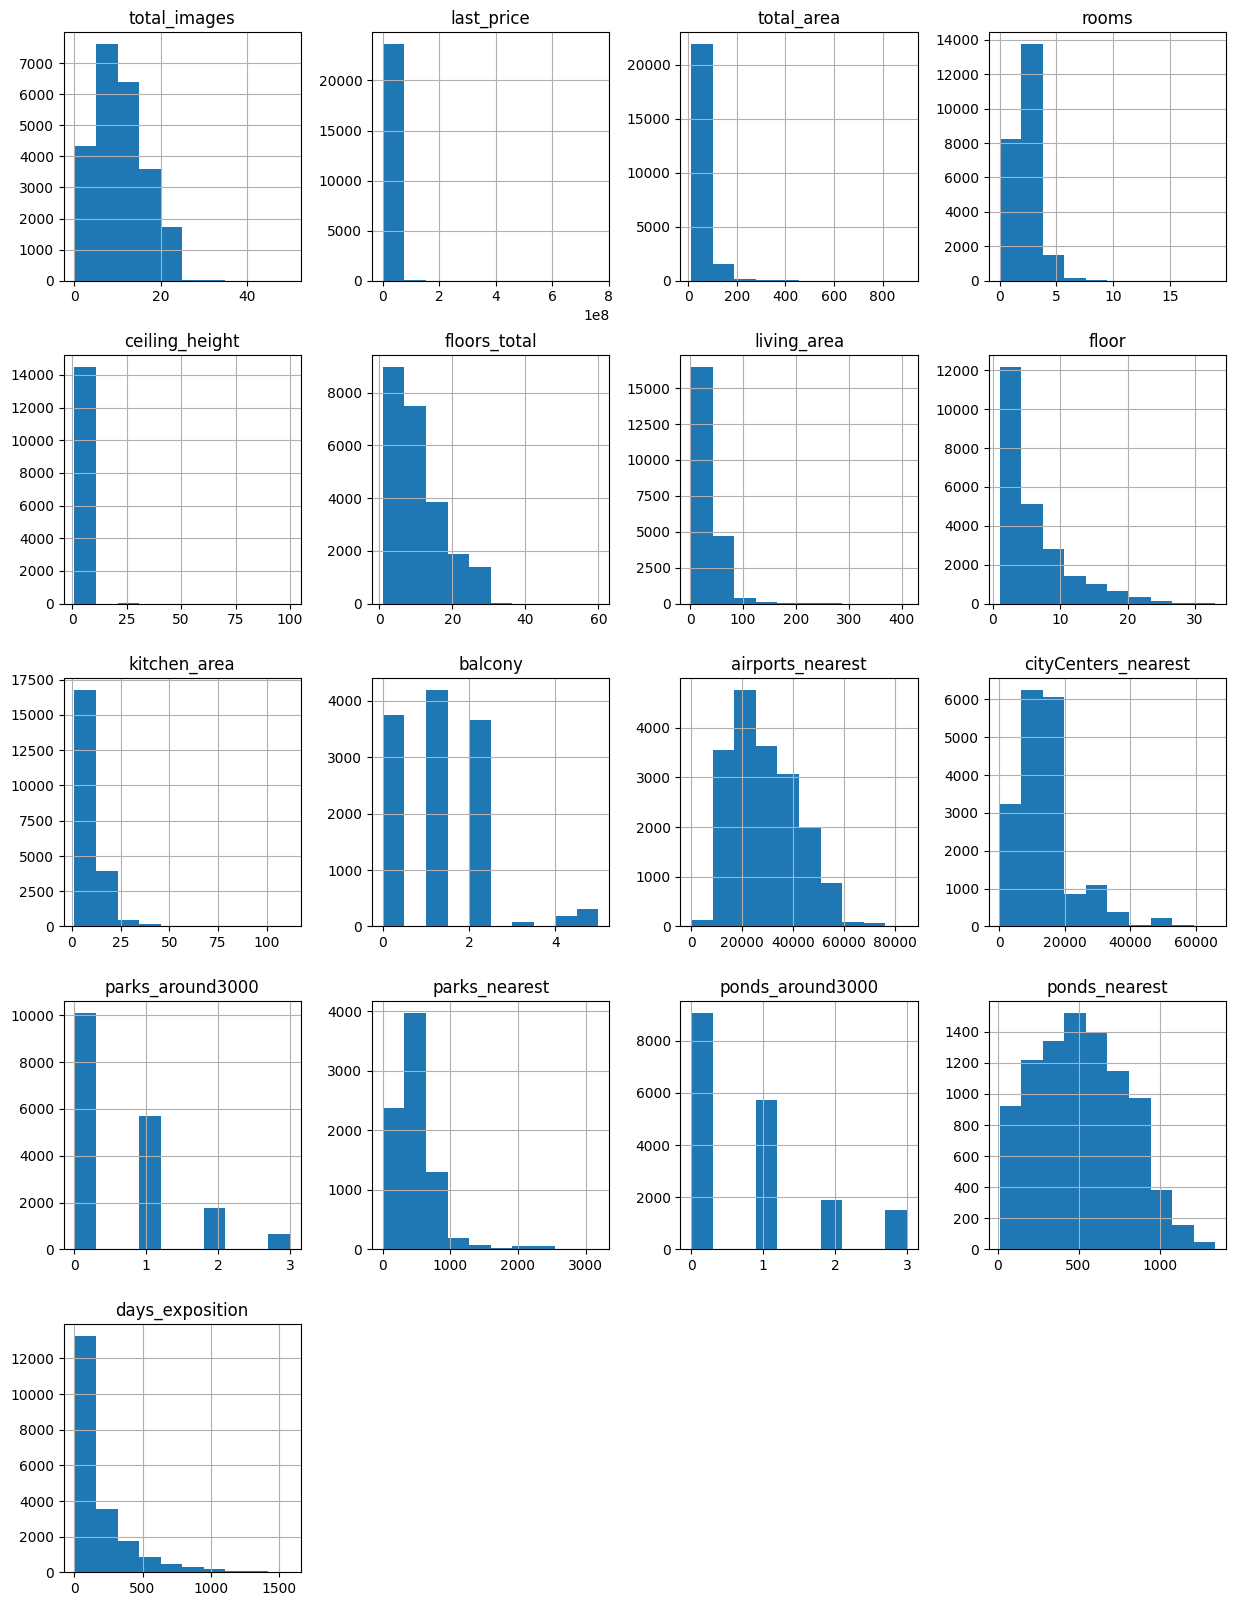

In [ ]:
#Гистограмма для всего ДФ
ax = data.hist(figsize=(15, 20))

## Предобработка данных

### Заполнение пропусков в данных

В представленных данных есть пропуски в следующих столбцах:
- ceiling_height           9195
- floors_total               86
- living_area              1903
- is_apartment            20924
- kitchen_area             2278
- balcony                 11519
- locality_name              49
- airports_nearest         5542
- cityCenters_nearest      5519
- parks_around3000         5518
- parks_nearest           15620
- ponds_around3000         5518
- ponds_nearest           14589
- days_exposition          3181

  Природа появления этих пропусков вероятно различается для каждого из них. Проанализируем столбцы с пропусками по отдельности.
  Начнем со столбца с большим количеством пропусков (balcony). Он хранит в себе информации о том, сколько балконов в объекте недвижимости. Наиболее вероятно, пустое значение в нем  - это не пропуск, а символ того, что у рассматриваемого объекта балконы отсутсвуют. Скорее всего потенциальные покупатели, рассматривая объявления, и не находя информации о количествые балконов, автоматически полагают, что балконов у данного объекта нет. Поэтому замена пропусков в данном столбце на нули закономерна. 

In [ ]:
#Заменим пустные значения в столбце balcony на нули  
data.loc[(data['balcony'].isna()), 'balcony'] = 0
#Определим сколько пропусков есть в каждом из столбцов датафрейма
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [ ]:
#Заменим пустные значения в столбце balcony на нули  
data.loc[(data['floors_total'].isna()), 'floors_total'] = 0
#Определим сколько пропусков есть в каждом из столбцов датафрейма
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Рассмотрим столбец is_apartment. Он содержит информацию о том, относится ли объект к аппартаметами или к жилой недвижимости. Ни по каким другим косвенным признакам, содержащимся в дататесте, идетифицировать тип объекта мы не можем. При этом тип объекта является чувствительным параметром для потенциального покупателя. Так как апартаменты, являясь коммерческой недвижимостью, имеют свои во многом негативные особенности (невозможность оформить прописку, оформить ипотеку, налоговый вычет и тд). С учетом изложенного нельзя "предположить", какое значение пропущено в каждой строчке для этого столбца. Но и удалить все строки с пропущенными значениями нельзя - их слишком много (20924). Поэтому принято решение, заменить пустые значения на строку "unknown". 

In [ ]:
#Замена пустных значений в столбце is_apartment на "unknown" 
data.loc[(data['is_apartment'].isna()), 'is_apartment'] = "unknown"

Рассмотрим столбец days_exposition . Он содержит информацию о том, какое количество дней объявление было активно. Фактически, это один из центральных показателей в проводимом исследовании. Ведь скорость исчезновения объявления в общем случае может быть приравнена к привлекательности объекта недвижимости и, соостветственно, скорости его продажи. Если этот параметр неизвестен - остальные данные строки теряют свою информативность. Рассчитаем долю строк, в которых отсутствует данные о времени размещения объявления.

In [ ]:
#Данные о количестве пропущенных значений в столбце days_exposition
print(f'Доля пропущенных записей в категории длительность размещения: {data["days_exposition"].isna().sum()/len(data):.1%}')

Доля пропущенных записей в категории длительность размещения: 13.4%


Потеря 13% данных непремлима при работе с отчисткой данных. Поэтому строки с пропусками в столбце days_exposition необходимо сохранить. Для этого заменим пропуски на флаг - заглушку. Предположим, что значение пустое, потому что объявление еще висит и срок его размещения нельзя вычислить. Во многих библиотека python для переменных, которые не удалось вычислить применяется величина -1. Копируя эти практики, заменим пропуски на -1. 

In [ ]:
#Замена пустных значений в столбце days_exposition на -1
data.loc[(data['days_exposition'].isna()), 'days_exposition'] = -1

In [ ]:
#Определим сколько пропусков есть в каждом из столбцов датафрейма после удаления
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Еще один максимально чувствительный с точки зрения исследования столбец - locality_name (название населенного пункта). Покупатели точно не будут рассматривать объявление об объекте, для которого неизвестен населенный пункт его расположения. Посчитаем долю строк с незаполненным именем населенного пункта. Если доля менее 1 %,удалим соответствующие строки.

In [ ]:
#Данные о количестве пропущенных значений в столбце locality_name
ratio = data["locality_name"].isna().sum()/len(data)

#Удаление записей (если их меньше 1%) или вывод на жкран доли нулевых записей (если их больше 1%) 
if ratio == 0:
    print(f'В ДФ нет пустых значений в столбце locality_name')
elif ratio < 0.01:   
    data.dropna(subset = ['locality_name'], inplace = True)
    print(f'Доля удаленных записей в категории название населенного пункта составила: {ratio:.1%}')
    #Обновление индексов 
    data.reset_index()
else:
    print(f'Доля удаленных записей в категории название населенного пункта составила: {ratio:.1%}')

Доля удаленных записей в категории название населенного пункта составила: 0.2%


Рассмотрим столбцы, содержащие данные о площадях объекта недвижимости (living_area, kitchen_area). Эти параметры также крайне важны. Покупатели не будут всерьез рассматривать объявление об объекте, для которого неизвестна жилая площадь. Просчитаем долю пропущенных значений для столбцов living_area, kitchen_area (когда оба столбца пустые, когда один из столбцов пустой) 

In [ ]:
#Данные о количестве одновременно пропущенных значений в столбцах kitchen_area и living_area
ratio_all = len(data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna())].index)/len(data)

#Данные о количестве пропущенных значений в столбце kitchen_area
ratio_kit = len(data.loc[(data['kitchen_area'].isna()) & (~data['living_area'].isna())].index)/len(data)

#Данные о количестве пропущенных значений в столбце living_area
ratio_liv = len(data.loc[(~data['kitchen_area'].isna()) & (data['living_area'].isna())].index)/len(data)

#Данные о количестве пропущенных значений в столбце total_area
ratio_total = len(data.loc[data['total_area'].isna()].index)/len(data)
print(f'''В ДФ число пропущенных записей о площадях составляет:
          - для столбца kitchen_area: {ratio_kit:.1%},
          - для столбца living_area: {ratio_liv:.1%},
          - для столбцов living_area и kitchen_area одновременно: {ratio_all:.1%},
          - для столбцов total_area : {ratio_total:.1%},
          - суммарно по рассматриваемым столбцам: {ratio_kit + ratio_liv + ratio_all + ratio_total:.1%}''')

В ДФ число пропущенных записей о площадях составляет:
          - для столбца kitchen_area: 3.4%,
          - для столбца living_area: 1.9%,
          - для столбцов living_area и kitchen_area одновременно: 6.2%,
          - для столбцов total_area : 0.0%,
          - суммарно по рассматриваемым столбцам: 11.4%


Так как доля пропущенных значений превышает 10%, удаление рассматриваемых записей считается неприемлимым. При этом наличие заполненного значения для площади очень желательно. Поэтому попробуем заменить пропущенные значения расчетными, используя данные об общей площади и следуя следующему алгоритму:
- если отсутсвует только один параметр, величину второго параметра выставить равным разности между общей площадью и известным параметром;
- если одновременно отсутсвуют данные о кухне и жилой площади и объект недвижимости имеет открытую планировку или является студией  выставим для кухни площадь, равную 5 м2 (минимальновозможная по СНИП), величину жилой площади выставим равной общей площади, уменьшенной на 5 м2;
- если одновременно отсутсвуют данные о кухне и жилой площади и объект является стандартной квартирой, разделенной на комнаты, заполним пропуски медианными значенниями заполняемого столбца, расчитанными по объектам с таким же количеством квартир.

In [ ]:
#Расчет медианных значений для разного числа комнат
living_area = {room: data.loc[(data['rooms'] == room) & (~data['living_area'].isna()), 'living_area'].median() for room in range(1, 21)}
kitchen_area = {room: data.loc[(data['rooms'] == room) & (~data['kitchen_area'].isna()), 'kitchen_area'].median() for room in range(1, 21)} 

#Заполнение пропусков  
for index, row_data in data.iterrows():
    #Если везде пустые значения
    if not row_data['kitchen_area'] > 0 and not row_data['living_area'] > 0:
        #Если это студия или открытая планировка
        if (row_data['open_plan'] == True or row_data['studio'] == True):
            data.loc[data.index == index, 'kitchen_area'] = 5
            data.loc[data.index == index, 'living_area'] = row_data['total_area'] - 5
        #Если есть комнаты
        else:
            #если сумма планируемых к записи площадей меньше общей площади, записанной в рассматриваемую сттроку
            if living_area[row_data['rooms']] + kitchen_area[row_data['rooms']] < row_data['total_area']:
                data.loc[data.index == index, 'kitchen_area'] = kitchen_area[row_data['rooms']]
                data.loc[data.index == index, 'living_area'] = living_area[row_data['rooms']]
            else:
                #Пропорционально уменьшаем площадь кухни и жилую площадь
                factor = row_data['total_area']/(kitchen_area[row_data['rooms']] + living_area[row_data['rooms']])
                data.loc[data.index == index, 'kitchen_area'] = factor*kitchen_area[row_data['rooms']]
                data.loc[data.index == index, 'living_area'] = factor*living_area[row_data['rooms']]
    #Если пустые значения только в кухне
    elif not row_data['kitchen_area'] > 0:
        data.loc[data.index == index, 'kitchen_area'] = row_data['total_area'] - row_data['living_area']
    #Если пустые значения только в жилой площади
    elif not row_data['living_area'] > 0: 
        data.loc[data.index == index, 'living_area'] = row_data['total_area'] - row_data['kitchen_area']
    else:
        pass
    
print(f"В ДФ осталось {len(data.loc[(data['living_area'].isna())|(data['kitchen_area'].isna())])} пустых значений в столбцах kitchen_area, living_area.")

В ДФ осталось 0 пустых значений в столбцах kitchen_area, living_area.


Рассмотрим столбцы, содержащие картографические данные:  parks_around3000, ponds_around3000. Эти столбцы содержат данные о количестве парков(водоемов) на расстоянии не более 3 км от объекта. Эти даные автоматически загружаются на основании сторонних картографических данных. Представляется возможным предположить, что, если система не смогла заполнить количество парков(водоемов) вблизи объекта, значит их нет. Заполним пропуски в столбцах parks_around3000, ponds_around3000 нулями.

In [ ]:
#Заполнение пропущенных значений столбца parks_around3000 на 0
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

#Заполнение пропущенных значений столбца ponds3000 на 0
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

Рассмотрим столбцы, содержащие картографические данные:  parks_nearest, ponds_nearest. Эти столбцы содержат данные о расстоянии до ближайшего парка и водоема. Логично, что если в столбцах parks_around3000, ponds_around3000 для объекта недвижимости стоит значение 0, то значения в столбцах parks_nearest, ponds_nearest должны быть не менее 3000. Посмотрим, какие расстояния, превышающие 3000 м, есть в дататесте.

In [ ]:
#Уникальные значения столбцов
print(f'Уникальные записи категории parks_nearest, превышающих 3000: {data.query("parks_nearest > 3000")["parks_nearest"].unique()}')
print(f'Уникальные записи категории ponds_nearest, превышающих 3000: {data.query("ponds_nearest > 3000")["ponds_nearest"].unique()}')

Уникальные записи категории parks_nearest, превышающих 3000: [3064. 3190. 3013.]
Уникальные записи категории ponds_nearest, превышающих 3000: []



Исходя из полученного результата, условимся, что расстояние более 3000 - фактически означает отсутсвие ближайшего парка(водоема).Чтобы не исказить исходные данные (так как в них есть значения 3064, 3190 и 3013 м) для пропущенных значений в столбцах parks_nearest, ponds_nearest, которым соответсвуют нули в столбцах parks_around3000, ponds_around3000, установим значение 4000. Оно одновременно будет сигнализировать о том, что данные установлены в процессе исследования, а не получены из исходного дататеста.

In [ ]:
#Заполнение пропущенных значений столбца parks_nearest, которым соответсвует 0 в столбце parks_around3000 на 4000
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 4000

#Заполнение пропущенных значений  столбца parks_nearest, которым соответсвует 0 в столбце parks_around3000 на 4000
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 4000

#Пустые значения в указанных столбцах
print(f"Пустые значения в столбце parks_nearest: {data['parks_nearest'].isna().sum()}")
print(f"Пустые значения в столбце ponds_nearest: {data['ponds_nearest'].isna().sum()}")

Пустые значения в столбце parks_nearest: 0
Пустые значения в столбце ponds_nearest: 0


Получается, что отсутсвие значений в столбцах parks_nearest, ponds_nearest и parks_around3000, ponds_around3000 было связано напрямую. Вместе с тем, опробированную  методику нельзя применить к столбцам airports_nearest, cityCenters_nearest. Посмотрим каким населеным пунктам соответсвуют наибольшие значения указанных столбцов и для каких населенных пунктов есть пропущенные значения. 


In [ ]:
#Населенные пункты с максимальным расстоянием до аэропорта и центра города 
print(f'10 максимальных расстояний до аэропорта (airports_nearest): {data[["airports_nearest", "locality_name"]].sort_values("airports_nearest", ascending = False).head(10)}')
print(f'10 максимальных расстояний до центра города (cityCenters_nearest): {data[["cityCenters_nearest", "locality_name"]].sort_values("cityCenters_nearest", ascending = False).head(10)}')

#Названия населенных пунктов, для которых размещены пустые значения в исследуемых столбцах 
print(f'Несколько названий населенных пунктов, для которых не указаны исследуемые расстаяния: { data.loc[(data["airports_nearest"].isna()) | (data["airports_nearest"].isna())]["locality_name"].unique()[0:10]}')

10 максимальных расстояний до аэропорта (airports_nearest):        airports_nearest       locality_name
9640            84869.0  посёлок Молодёжное
5340            84853.0  посёлок Молодёжное
577             84665.0  посёлок Молодёжное
20746           84006.0  посёлок Молодёжное
5218            83758.0  посёлок Молодёжное
18884           81607.0         Зеленогорск
2974            81355.0         Зеленогорск
4441            78527.0         Зеленогорск
939             75646.0         Зеленогорск
376             73827.0         Зеленогорск
10 максимальных расстояний до центра города (cityCenters_nearest):        cityCenters_nearest       locality_name
9640               65968.0  посёлок Молодёжное
5340               65952.0  посёлок Молодёжное
577                65764.0  посёлок Молодёжное
20746              65105.0  посёлок Молодёжное
5218               64857.0  посёлок Молодёжное
18884              62706.0         Зеленогорск
2974               62454.0         Зеленогорск
16569        

In [ ]:
#Максимальные расстояниея до аэропорта и центра города для Санкт-Петербурга
print(f'10 максимальных расстояний до аэропорта (airports_nearest) в Санкт-Петербурге: {data.loc[data["locality_name"] == "Санкт-Петербург"]["airports_nearest"].sort_values(ascending = False).head(10)}')
print(f'10 максимальных расстояний до центра города (cityCenters_nearest) в Санкт-Петербурге: {data.loc[data["locality_name"] == "Санкт-Петербург"]["cityCenters_nearest"].sort_values(ascending = False).head(10)}')

10 максимальных расстояний до аэропорта (airports_nearest) в Санкт-Петербурге: 3012     54784.0
10977    54784.0
13783    54723.0
7460     54723.0
7518     54723.0
2213     54723.0
9948     54723.0
21558    54723.0
16271    54535.0
13591    54535.0
Name: airports_nearest, dtype: float64
10 максимальных расстояний до центра города (cityCenters_nearest) в Санкт-Петербурге: 12160    29493.0
13031    29343.0
16787    29263.0
19892    28806.0
11652    28644.0
10798    28644.0
814      28109.0
22916    28018.0
1111     28018.0
17798    28018.0
Name: cityCenters_nearest, dtype: float64


В столбцах airports_nearest, cityCenters_nearest размещена информация о расстоянии до аэропорта и центра города. Причем для соседних с Санкт-Перербургом населенных пунктов очевидно указано расстояние до центра Санкт-Перербурга и его аэропортов. Попробуем заполнить пустные значения в указанных столбцах исходя из следующей логики. 
1. Записи с объектами недвижимости из Санкт-Петербурга удалить. Заполнив эти столбцы максимально возможными значениями (например, максимальной протяженностью города, 44 км) мы вероятно можем исказить результаты исследования. А вдруг в дататесте не указаны расстояния для объектов, расположенных непосредственно в центре. Мы не можем это проверить. Поэтому выдумывать значение, которым заполнить пропуски в данном случае, крайне безответственно.
2. Записи с с объектами недвижимости из соседних с Санкт-Пнтнрбургом городов заполнить средними по каждому городу значениями. С учетом, что расстояние до Санкт-Петербурга и его аэропортов значительно больше протяженности любого соседнего города, такое допущение не должно внести сильных искажений в данные. 

In [ ]:
#Данные о количестве пропущенных значений в столбцах airports_nearest, cityCenters_nearest  для Санкт-Петербурга
ratio_airports = len(data.loc[(data["locality_name"] == "Санкт-Петербург") & (data["airports_nearest"].isna())])/len(data)
ratio_city = len(data.loc[(data["locality_name"] == "Санкт-Петербург") & (data["cityCenters_nearest"].isna())])/len(data)

def clean_with_ratio(df, norma_for_ratio, ratio, column):
    if ratio == 0:
        print(f'В ДФ нет пустых значений в столбце {column}')
    elif ratio < norma_for_ratio:
        df.query('locality_name == "Санкт-Петербург"').dropna(subset = [column])
        print(f'Доля удаленных записей в категории название населенного пункта составила: {ratio:.1%}')
    else:
        print(f'Доля удаленных записей в категории название населенного пункта составила: {ratio:.1%}')
    return df
    
data =  clean_with_ratio(data, 0.01, ratio_airports, "airports_nearest")  
data =  clean_with_ratio(data, 0.01, ratio_airports, "cityCenters_nearest") 

#Обновление индексов 
try:
    data.reset_index()
except:
    pass

Доля удаленных записей в категории название населенного пункта составила: 0.4%
Доля удаленных записей в категории название населенного пункта составила: 0.4%


Доля удаленных значений не певышает 0.4%, что приемлимо для этапа отчистки.

Решено записи с объектами недвижимости из соседних с Санкт-Петербургом городов заполнить средними по каждому городу значениями. Но прежде чем считать средние значения прийдется избавиться от дубликатов в названиях населенных пунктов.

In [ ]:
#Количество уникальных названий населенных пунктов
print(f'Количество "уникальных" названий до обработки дубликатов {data["locality_name"].nunique()}')

#Отдельный список из "уникальных" названий населенных пунктов
name_list= [old_name for old_name in data["locality_name"].unique()]

print(name_list)

#Список подстрок, которые надо удалить из названий, чтобы привести их к единому знаменателю
sub_list = ['  ','посёлок', 'поселок', 'деревня','село', 'городского типа', 'городской', 'коттеджный','садовое товарищество', 'садоводческое некоммерческое товарищество']

#Отчищающая функция
def clean_name(name: str, sub_list: list) -> str:
    for sub in sub_list:
        name = name.replace(sub, ' ')
    return name.strip()

#Удаление из названий списка обозначенных подстрок 
clean_name_list = [clean_name(name, sub_list) for name in name_list]
clean_name_list = list(set(clean_name_list))

#Формирование словаря {clean_name: [names]}
name_dict = {}
for clean_name in clean_name_list:
    items_for_dict = [name for name in data["locality_name"].unique() if clean_name in name]
    if len(items_for_dict) > 1:
        name_dict[clean_name] = items_for_dict
  
#Вывод словаря на экран и проверка его вручную. 
print(name_dict)

Количество "уникальных" названий до обработки дубликатов 364
['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино', 'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой', 'посёлок городского типа Лебяжье', 'посёлок городского типа Сиверский', 'поселок Молодцово', 'поселок городского типа Кузьмоловский', 'садовое товарищество Новая Ропша', 'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино', 'поселок городского типа Ефимовский', 'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское', 'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая', 'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'И

В полученный словарь ошибочно попали записи, содержащие похожие названия разных населенных пунктов. Эти записи надо будет удалить из словаря:
- 'Высоцк': ['село Русско-Высоцкое', 'Высоцк'],
- 'Луга': ['Луга', 'посёлок Усть-Луга', 'поселок Усть-Луга'],
- 'Кингисепп': ['Кингисепп', 'поселок Кингисеппский']
- 'Коммунар': ['Коммунар', 'поселок Коммунары']
- 'Бегуницы': ['деревня Бегуницы', 'деревня Старые Бегуницы']
- 'Романовка':['поселок Романовка', 'деревня Малая Романовка'],
- 'Высоцк': ['село Русско-Высоцкое', 'Высоцк']


Кроме того некорректно сформировались записи, в которые попала смесь из как разных названий одинаковых наседенных пунктов и названий других населенных пунктов. Эти записи надо откорректировать, исключив из них лишнее: 
- 'Бор':  ['поселок городского типа Красный Бор', 'Сосновый Бор', 'посёлок городского типа Красный Бор', 'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор', 'посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор', 'деревня Борисова Грива']
- 'Старая': ['деревня Старая', 'поселок Старая Малукса', 'село Старая Ладога', 'деревня Старая Пустошь', 'посёлок Старая Малукса']

In [ ]:
#Исключение из словаря ошибочных записей
wrong_dict_keys = ['Бор', 'Старая', 'Луга', 'Кингисепп', 'Коммунар', 'Бегуницы', 'Романовка', 'Высоцк']
for key in wrong_dict_keys:
    name_dict.pop(key)

#Корректировка не совсем верных записей
name_dict['Старая Малукса'] =  ['поселок Старая Малукса', 'посёлок Старая Малукса'] 
name_dict['Красный Бор'] = ['поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор']
name_dict['Зелёный Бор'] = ['посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор']

#Формирование словаря замены для ДФ
change_dict = {}
for item_list in name_dict.values():
    change_dict = {**change_dict, **{item: item_list[0] for item in item_list if item != item_list[0]}}
    
#Замена названий гаселенных пунктов
data['locality_name'] = data['locality_name'].replace(change_dict)
print(f'Количество "уникальных" названий после обработки дубликатов {data["locality_name"].nunique()}')

Количество "уникальных" названий после обработки дубликатов 302


Можно считать, что удаление дубликатов прошло успешно. Количество уникальных названий населенных пунктов сократилось на 62 позиций.

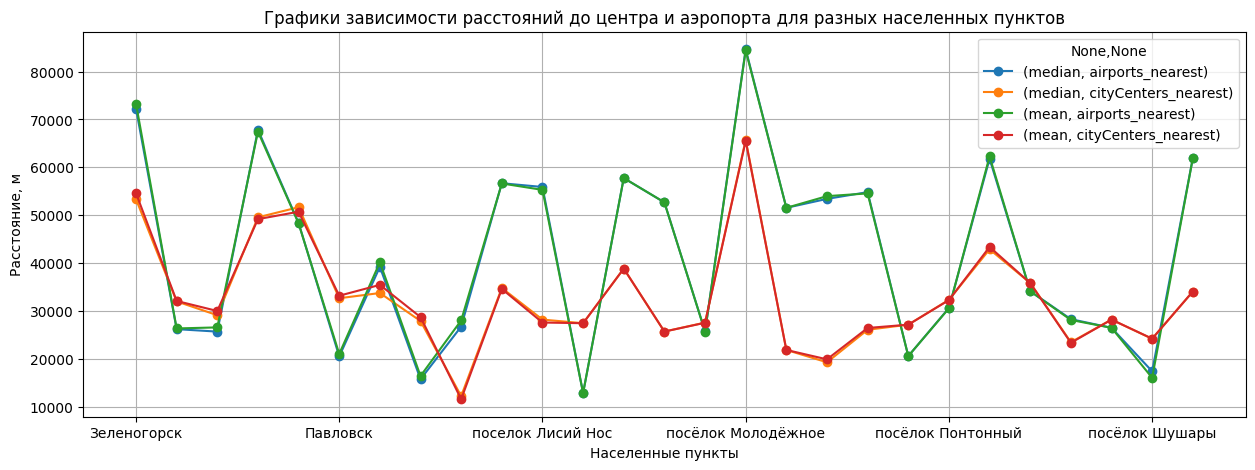

In [ ]:
# Графики зависимости расстояний до центра и аэропорта для разных населенных пунктов
data\
.query('airports_nearest > 0 and cityCenters_nearest > 0')\
.pivot_table(index = 'locality_name', values = ['airports_nearest', 'cityCenters_nearest'], aggfunc = ['median', 'mean'])\
.plot(style = 'o-', figsize = (15,5), grid = True, \
      xlabel = "Населенные пункты", ylabel = 'Расстояние, м', title = "Графики зависимости расстояний до центра и аэропорта для разных населенных пунктов");

Судя по графику медианные и средние значения для раасстояний до центра и аэропорта практически полностью совпадают. Кроме того общие виды графиков для расстояний до аэропорта и до центра города схожи, значит предположение о том, что оба этих расстояния - это, фактически, расстония до объектов Санкт-Петербурга. С учетом изложенного, не снижая достоверности данных можно заменить пустые значения указанных столбцов на медианные значения.

In [ ]:
#Медианные значения расстояний для каждого населенного пункта до замены
midians_airports_do = data\
.loc[~data['airports_nearest'].isna()].groupby("locality_name")['airports_nearest'].median()

midians_city_do = data\
.loc[~data['cityCenters_nearest'].isna()].groupby("locality_name")['cityCenters_nearest'].median()

Записи о 275 населенных пунктах не имеют информации об удаленности до ближайшего аэропорта
Записи о 275 населенных пунктах не имеют информации об удаленности до ближайшего центра города
Всего 4829 записей не содержит информации об удаленности до ближайшего аэропорта.
Всего 4829 записей не содержит информации об удаленности до ближайшего центра города.


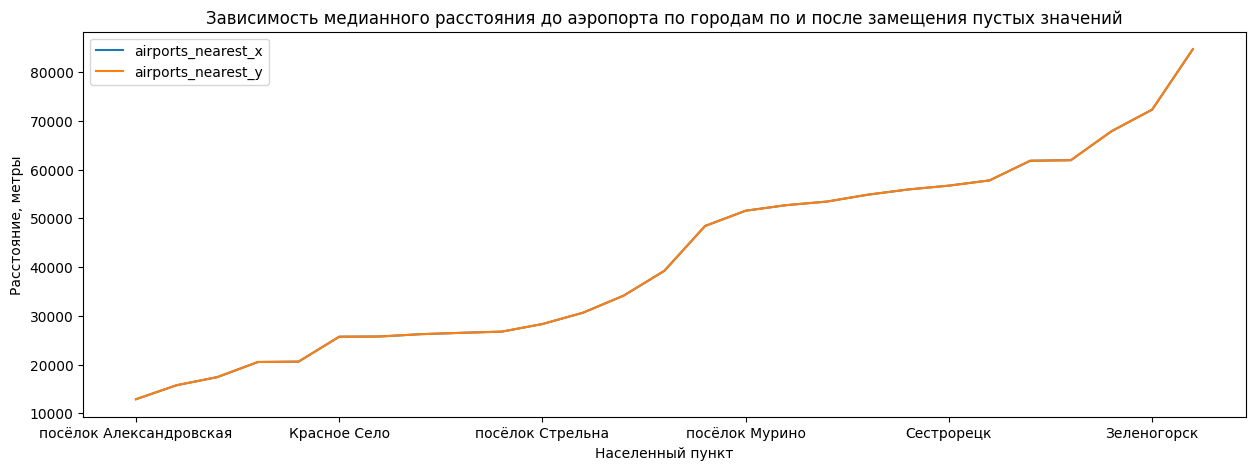

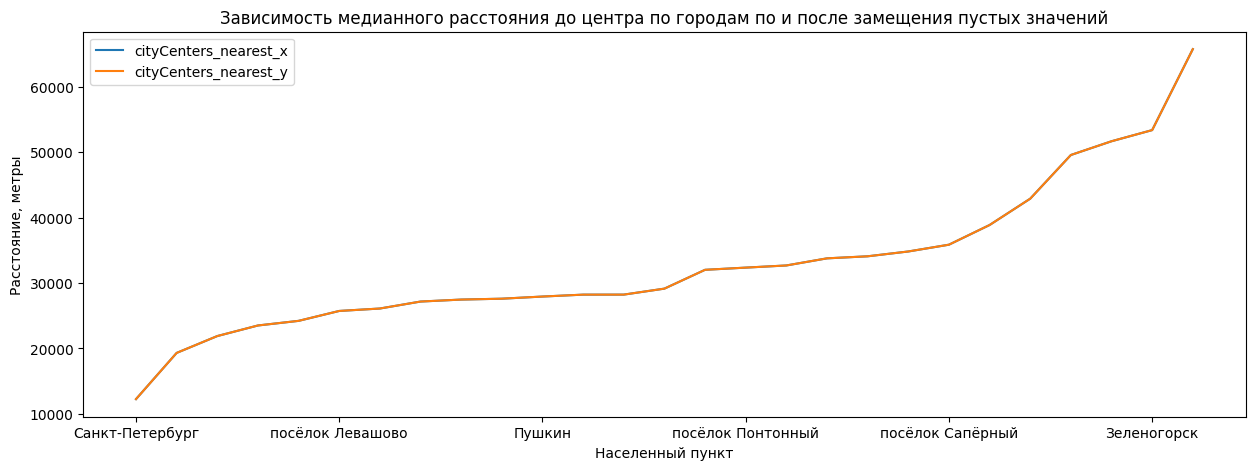

In [ ]:
#Массив сгруппированных по названию населенного пункта данных из тех записей, для которых указаны данные о расстоянии до аэропорта
for name, string in data.loc[~data['airports_nearest'].isna()].groupby("locality_name"):
    #В общем датафрейме замещаем пустые записи о расстоянии до аэропорта для тех населенных пунктов, для которых в других строчках дататеста есть необходимые данные для расчета медианы по нас. пункту 
    data.loc[(data['locality_name'] == name)&(data['airports_nearest'].isna()),'airports_nearest'] = string['airports_nearest'].median()
    
#Массив сгруппированных по названию населенного пункта данных из тех записей, для которых указаны данные о расстоянии до центра
for name, string in data.loc[~data['cityCenters_nearest'].isna()].groupby("locality_name"):
    #В общем датафрейме замещаем пустые записи о расстоянии до аэропорта для тех населенных пунктов, для которых в других строчках дататеста есть необходимые данные для расчета медианы по нас. пункту 
    data.loc[(data['locality_name'] == name)&(data['cityCenters_nearest'].isna()),'cityCenters_nearest'] = string['cityCenters_nearest'].median()

print(f'Записи о {len(data.loc[data["airports_nearest"].isna()].groupby("locality_name"))} населенных пунктах не имеют информации об удаленности до ближайшего аэропорта')
print(f'Записи о {len(data.loc[data["cityCenters_nearest"].isna()].groupby("locality_name"))} населенных пунктах не имеют информации об удаленности до ближайшего центра города')
print(f'Всего {data["airports_nearest"].isna().sum()} записей не содержит информации об удаленности до ближайшего аэропорта.')
print(f'Всего {data["cityCenters_nearest"].isna().sum()} записей не содержит информации об удаленности до ближайшего центра города.')

#Медианные значения расстояний для каждого населенного пункта до замены
midians_airports_after = data\
.loc[~data['airports_nearest'].isna()].groupby("locality_name")['airports_nearest'].median()

midians_city_after = data\
.loc[~data['cityCenters_nearest'].isna()].groupby("locality_name")['cityCenters_nearest'].median()

#Сравнение статистических показателей до и после заполнения пропусков
midians_airports = pd.merge(midians_airports_do, midians_airports_after, right_index = True, left_index = True)
midians_city = pd.merge(midians_city_do, midians_city_after, right_index = True, left_index = True)

ax = midians_airports.sort_values(by = 'airports_nearest_x')\
.plot(figsize = (15,5), xlabel = 'Населенный пункт', ylabel = 'Расстояние, метры',\
      title = 'Зависимость медианного расстояния до аэропорта по городам по и после замещения пустых значений')
ax = midians_city.sort_values(by = 'cityCenters_nearest_x')\
.plot(figsize = (15,5), xlabel = 'Населенный пункт', ylabel = 'Расстояние, метры',\
      title = 'Зависимость медианного расстояния до центра по городам по и после замещения пустых значений')
      

Проведенные манипуляции позволили незначительно снизить количество пропусков в столбцах 'airports_nearest', 'cityCenters_nearest'. При этом статистические показатели выборки по параметру раастоняие до аэропорат(до центра), сгруппированному относительно населенных пунктов, остались неизменными. Для оставшихся 238  населенных пунктов (3844 записи) заполнить пропуски не удалось вследствии отсутвия данных о расстоянии.  

Рассмотрим столбец ceiling_height . В нем содержиться информация о высоте потолков.

In [ ]:
#Уникальные значения высоты потолков
display(data['ceiling_height'].sort_values().unique())

Почистим данные о высоте потолков. 
1. В первую очередь, исправим объективные ошибки в данных. Появление значений 22.6, 24, 25, 27, 27.5 в дататесте практически очевидно связана с тем, что высоту указали в сантиметрах, хотя система ожидала в метрах. Заменим указанные значения, поделив их на 100.
2. Исключим из дататеста строчки, содержащие значения маловероятных высот для потолков. 
 
 2.1 Минимальнмым порогом примем величину, равную 2.5 м (такая минимальная величина установлена требованиями СНиП)
 
 2.2 Максимальным порогом примем величину, равную 4 м (максимальная величина законом не установлена, исходим из соображений здравого смысла)


In [ ]:
#Исправление объективных ошибок в данных (высота приведена в см вместо метров).
change_dict = {14.: 1.4, 20.: 2, 22.6 : 2.26, 24.: 2.4, 25.: 2.5, 26.: 2.6, 27.: 2.7, 27.5: 2.75, 32.: 3.2, 100.: 10}
data['ceiling_height'] = data['ceiling_height'].replace(change_dict)

#Удаление строк, в которых высота потолков с физической точки зрения очень маловероятна 
print(f"Из дадасета исключаются стороки c аномальными значениями, доля которых: {len(data.loc[(data['ceiling_height'] >= 6) | (data['ceiling_height'] == 1) | (data['ceiling_height'] == 1.2)])/len(data):.3%}")
data = data.loc[(data['ceiling_height'].isna()) | ((data['ceiling_height'] < 6) & (data['ceiling_height'] > 1))]

In [ ]:
# Add title and axis names
ax = data['ceiling_height'].plot(kind = 'hist', bins = 100, range = (2.2, 5), figsize = (15,5),\
                                 title = 'График распределения высоты потолков', ylabel = "Количество объектов")
ax.set_xlabel("Высота потолков")
ax.set_ylabel('Количество объектов');

    Судя по гистограмме, есть несколько значений высот, которые встречаются гораздо чаще других. При этом если сравнивать только эти наиболее часто встречающиеся высоты, то они почти все расположены в диапазоне 2.4 - 2.8 м. Помимо этого есть значительное количество записей со значениями  3 м. Можно предположить, что оснавная масса значений - высота потолков в среднестатистическом жилье. Значения выше 3 м - наиболее вероятно связаны с элитным жильем. 

    Но в дататесте нет переменной, которая хранила бы тип недвижимости. Что очень неправильно с точки зрения полноты и достоверности исследования. В идеальном мире можно было бы разделить данные на две категории (квартиры эконом класса и квартиры премиум класса) и для каждой из них просчитать медианное значение, которым заполнить пропуски в объектах соответствующего класса. Так как представленный ДФ нам не позволяет реализовать описанный алгоритм, попробуем поступить немного иначе. Найдем взаимосвязь между высотой потолков и расстоянием до центра города, предполагая, что чем ближе к центру, тем элитнее жилье.

In [ ]:
axes = data.plot(x='ceiling_height', y='cityCenters_nearest', kind='scatter', alpha=0.1,\
        title = 'График связи между высотой потолков и расстоянием от центра города',
        xlabel= "Высота потолков", ylabel = "Расстояние, метры") 

In [ ]:
axes = data.plot(x='ceiling_height', y='cityCenters_nearest', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True,\
          title = 'График связи между высотой потолков и расстоянием от центра города',\
          xlabel= "Высота потолков", ylabel = "Расстояние, метры")

Судя по диаграмме рассеяния, частичная связь между расстоянием и высотой потолков есть. Можно предположить, что если расстояние до центра меньше 10 км, то высота потолков будет лежать в диапазоне 2.8 и больше метров. Медианные значения - около 3 м. Если расстояние до центра больше 10 км, то высота потолков будет лежать в диапазоне 2.5 до 2.8 м. Медианные значения - около 2.6 м. Кажется разумным заполнить пропуски в столбце 'ceiling_height' используя это наблюдение.

В результате всех манипуляций в ДФ остались пропуски в 3 столбцах (airports_nearest, cityCenters_nearest, floors_total), с которыми нет возможности что-то сделать. В floors_total - всего 9 штук. Удалим их.

In [ ]:
print(f"На этапе обработки пропущенных значений из дадасета удалены записи, доля которых: {(1 -len(data)/original_len):.1%}")

### Исправление ошибок в данных

На предыдущем этапе, удалось фактически полностью избавиться от пропусков в ДФ. Теперь откорректируем используемые в нем типы данных. 

1. Очевидно, что количество парков, водоемов, балконов, этажей всегда должно быть целым числом. Целые числа больше подходят для таких значений и занимают меньше памяти, поэтому заменим тип данных столбцов (floors_total, balcony, parks_around3000, ponds_around3000, days_exposition) на int.
2. Приведем столбец first_day_exposition к типу  datetime
4. Переведем расстояния из метров в километры

In [ ]:
#Замена типа данных столбцов на int
change_list = ['parks_around3000', 'ponds_around3000', 'floors_total', 'balcony', 'days_exposition']
for column in change_list:
    #Переводим все значения столбцов в целые числа
    for item in data[column]:
        data.loc[data[column] == item, column] = int(item)
     #Заменяем ти столбцов
    data[column] = data[column].astype('int32')  

#Выведем уникальные значения этих столбцов
print(f'Уникальные записи категории parks_around3000 после замещения пустых значений: {data["parks_around3000"].unique()}')
print(f'Уникальные записи категории ponds_around3000 после замещения пустых значений: {data["ponds_around3000"].unique()}')
print(f'Уникальные записи категории floors_total после замещения пустых значений: {data["floors_total"].unique()}')
print(f'Уникальные записи категории balcony после замещения пустых значений: {data["balcony"].unique()}')
print(f'Уникальные записи категории days_exposition после замещения пустых значений: {data["days_exposition"].unique()}')


In [ ]:
#Замена типа данных столбца first_day_exposition на datetime с округлением в 1 час
data['first_day_exposition'] = pd\
.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')\
.dt.round('1H')

Проверим, есть ли какие-то явные аномалии в оставшихся строках ДФ. Для этого сначала посмотрим на статистику, предоставляемую методом describe.

In [ ]:
display(data.describe())

Что видно уже сейчас ?
1. В столбце total_images есть запись с неправдобообно большим количеством фото (50 шт)
2. В столбце total_area  есть запись с неправдобообно большим метражом (900 м2) 
3. В столбце rooms  есть запись с неправдобообно большим количеством комнат (16). Возможно это та же запись, что указана выше
4. В столбце living_area  есть запись с неправдобообно большим метражом (409.7 м2). Возможно это та же запись, что указана выше 
5. В столбце living_area  есть запись с неправдобообно маленьким метражом (2 м2). 
6. В столбце kitchen_area  есть запись с неправдобообно маленьким метражом (2 м2). 

Значит дополнительно и более внимательно проверим столбцы total_images, rooms, total_area, living_area, kitchen_area. 

#### Столбец total_images

In [ ]:
# Выводим гистограмму для столбца total_images
ax = data['total_images'].plot(kind = 'hist', bins = 100, xlabel = "Количество фотографий", ylabel = "Количество объектов", \
                          title = "Количество объектов с разным кол-вом фотографий")

ax.set_xlabel("Количество фотографий")
ax.set_ylabel('Количество объектов')
#Выводим количество уникальных значений для столбца total_images
display(data.groupby('total_images')['total_images'].count())

Распределение количества фотографий в целом имеет форму распределения Пуассона: полученный график асимметричен, он смещен вправо, и при этом стремиться к виду нормального распределения (так как число наблюдений достаточно большое). Максимум этого графика расположен в промежутке между 9 и 11 фотографиями, что вполне предсказуемо. При этом на нем есть явно аномальный выброс - резкий скачок на значении 20 фото. Просмотр записей, у которых total_images = 20, не показал ничего странного. Поэтому можно предположить, что причина появления этого скачка объясняется психологей людей. Люди любят круглые числа и стараются выложить не 13, 16, 17 фото, а красивое, круглое число - 20 шт. Вместе с тем, число фото больше 30 - все-таки можно принть аномалией тем более это всего 4 записи. 

In [ ]:
#Создание датафрейма без аномалий
print(f"Из дадасета исключаются стороки с аномальными значениями, доля которых: {len(data.query('total_images >= 30'))/len(data):.1%}")
data = data.query('total_images < 30')

#### Столбец rooms

In [ ]:
# Гистограмма для столбца rooms c очень большим количеством комнат
ax = data['rooms'].plot(kind = 'hist', bins = 100, range = (6,17), xlabel = "Количество комнат", \
                          title = "Количество объектов с разным кол-вом комнат")

ax.set_xlabel("Количество комнат")
ax.set_ylabel('Количество объектов');

# троки дататеста c очень большим количеством комнат (> 11)
display(data.query('rooms > 11'))

Среди рассмотренных записей, сомнения вызывает только запись с индексом 19540. В ней содержится информация о продаже объекта недвижимости, в котором 12 комнат и это в целом нормально. Но стоимость объекта 420 миллионов - черезмерно высокая. Очень мало вероятно, что объявления о реальной продаже таких дорогих и огромных объектов всерьез публикуют на сайтах объявлений. Удалим эту строчку данных из основного ДФ, оставив все остальные. 

In [ ]:
#Удаление аномалий
print(f"Из дадасета исключаются стороки с аномальными значениями, доля которых: {len(data.query('rooms >= 13'))/len(data):.1%}")
data = data.query('rooms < 13')

#### Столбец total_area 

In [ ]:
#Записи, в которых черезмерно большие площади (total_area). 
display(data.query('total_area > 400').sort_values(by = 'total_area'))

Площадь самой большой квартиры Санкт-Петербурга составляет 539 квадратных метров. Об этом сообщается в материалах аналитиков ЦИАН. В нашем ДФ квартир, площадью более 500 м2 осталось 6. Удалим их, ведь такие огромные площади - это точно исключение и маловероятное событие. 

In [ ]:
#Основной датафрейм
print(f"Из дадасета исключаются стороки с аномальными значениями, доля которых: {len(data.query('total_area >= 500'))/len(data):.1%}")
data = data.query('total_area < 500')

Рассмотри записи, в которых черезмерно маленькие площади (living_area, kitchen_area). Согласно требованиям СП 54.13330.2016 Здания жилые многоквартирные, установлены следующие минмальнодопустимые значения для площадей в жилых помещениях.

- Общей жилой комнаты в однокомнатной квартире — 14 м².
- Общей жилой комнаты в квартирах с числом комнат две и более — 16 м². 
- Спальни — 8 м² (на двух человек — 10 м²); кухни — 8 м².
- Кухонной зоны в кухне-столовой — 6 м².
В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м².
Возьмем минимальнодопустимые значения c небольшими разумными допущениями :
- Если одна комната: жилая площадь - 6 м², кухня - 4 м².
- Если две комнаты:  жилая площадь - 14 м², кухня - 4 м² 

Рассмотрим срез данных по объектам недвижимости, метраж которых не соответсвует установленным нормам.

In [ ]:
#Однокомнатная квартира
data\
.query('(kitchen_area < 4 or living_area < 6) and rooms == 1')\
.plot(x='kitchen_area', y='living_area', kind='scatter', alpha=0.5, xlabel = "Площадь кухни", \
                          ylabel = "Жилая площадь", title = "Взаимосвязь между жилой площадью и площадью кухни в однокомнатной квартире")
plt.show()

#Двух и более комнатные квартиры
data\
.query('(kitchen_area < 4 or living_area < 14) and rooms == 2')\
.plot(x='kitchen_area', y='living_area', kind='scatter', alpha=0.5 , xlabel = "Площадь кухни", \
                          ylabel = "Жилая площадь", title = "Взаимосвязь между жилой площадью и площадью кухни в многокомнатных квартирах")
plt.show()

Судя по диаграммам рассеяния в дататесте есть квартиры, в которых перепутаны местами площади кухни и жилой комнаты. Это точки ниже диагонали(рассположенные в правом нижнем углу). Поменяем жилую площадь и площадь кухни местами там, где площадь кухни больше жилой площади.

In [ ]:
#Обновление индексов 
data.reset_index(inplace = True)
#Замена площадей местами в основном дататесте
for index in data.index - 1:
     if data.iloc[index]['kitchen_area'] > data.iloc[index]['living_area']:
        kitchen_area = data.iloc[index]['kitchen_area']
        living_area = data.iloc[index]['living_area']
        data.loc[index, 'kitchen_area'] = living_area
        data.loc[index, 'living_area'] = kitchen_area  

In [ ]:
#Однокомнатная квартира
data\
.query('(kitchen_area < 4 or living_area < 6) and rooms == 1')\
.plot(x='kitchen_area', y='living_area', kind='scatter', alpha=0.5, xlabel = "Площадь кухни", \
                          ylabel = "Жилая площадь", title = "Взаимосвязь между жилой площадью и площадью кухни в однокомнтной квартире")
plt.show()

#Двух и более комнатные квартиры
data\
.query('(kitchen_area < 4 or living_area < 14) and rooms > 1')\
.plot(x='kitchen_area', y='living_area', kind='scatter', alpha=0.5,  xlabel = "Площадь кухни", \
                          ylabel = "Жилая площадь", title = "Взаимосвязь между жилой площадью и площадью кухни в многокомнатных квартирах")
plt.show()

Теперь диаграмма рассеяния выглядит правильно.  Да, есть точки, которые ниже диагонали, но это потому что, масштаб графика изменился. Вместе с тем строк, в которых значения метража не соответсвует стандартам стало меньше (из-за того, что жилая площадь у них стала больше после проведенной замены). Оставшиеся строки, не удовлетворяющие стандартам малочисленны  и их можно удалить.

In [ ]:
#Основной датафрейм
ratio = len(data.query('\
    ((kitchen_area <= 4 or living_area <= 6) and rooms == 1) or\
    ((kitchen_area < 4 or living_area < 14) and rooms > 1)'))/len(data)
print(f"Из ДФ исключаются стороки с аномальными значениями, доля которых: {ratio:.1%}")

data = data.query('\
        (kitchen_area > 4 and living_area > 6 and rooms == 1) or \
        (kitchen_area > 4 and living_area > 14 and rooms > 1) ')


Мы удалили из дататеста объекты недвижимости, у которых метраж такой маленький, что не удовлетворят нормам Российского законодательства и и поменяли местами значения метража для жилой площади и площади кухни в строчках, где очевидно они ошибочно были перепутаны. Теперь проверим, есть ли в дататесте объекты, у которых общая площадь меньше, чем сумма площадей жилых комнат и кухни. 

In [ ]:
#Графики для величин total_area, living_area, kitchen_area
axes = data.query('total_area < living_area + kitchen_area')[['index','total_area']]\
.plot(x = 'index', y = 'total_area', figsize = (20, 10), grid = True, style = 'o-', \
      label = 'total_area',  xlabel = "Номер записи об объявлении", \
      ylabel = "Площадь", title = "Сопоставление общей, жилой и кухонной площадей")

ax2 = data.query('total_area < living_area + kitchen_area')[['index','living_area']]\
.plot(x = 'index', y = 'living_area', figsize = (20, 10), grid = True, style = 'o-', \
      label = 'living_area',  xlabel = "Номер записи об объявлении", \
      ylabel = "Площадь", title = "Сопоставление общей, жилой и кухонной площадей", ax = axes)

ax3 = data.query('total_area < living_area + kitchen_area')[['index','kitchen_area']]\
.plot(x = 'index', y = 'kitchen_area', figsize = (20, 10), grid = True, style = 'o-',\
      label = 'kitchen_area',  xlabel = "Номер записи об объявлении", ylabel = "Площадь",\
      title = "Сопоставление общей, жилой и кухонной площадей", ax = axes)


По графику видно, что общая площадь практически полностью определяется жилой площадью, что ожидаемо. Также по графику видно, что записей, в которых общая площадь меньше суммы чем сумма площадей жилых комнат и кухни очень мало. Это позволяет нам удалить их значительно не ухудшая представительность выборки.

In [ ]:
#Удаление некорректных данных
print(f"Из ДФ исключаются стороки с аномальными значениями, доля которых: {len(data.query('total_area < living_area + kitchen_area'))/len(data):.1%}")
data = data.query('total_area >= living_area + kitchen_area')

#### Столбец floor

Последнее, что необходимо проверить - нет ли ошибки в данных об этажности. Нет ли в ДФ данных, в которых этаж объекта недвижимости болше, чем общее количество этажей в доме.

In [ ]:
#Создаем отдельный столбец чтобы использовав его исключить конфликт с методом floor
data['my_floor'] = data['floor']

In [ ]:
print(f"Количество записей с ошибкой в этажности: {len(data.query('floors_total < my_floor'))}")
print(f"Количество оставшихся в основном дататесте строк: {len(data)}")

<div style="border:solid Aqua 2px; padding: 40px">
<b>Выводы по этапу "Предъобработка данных"</b><br>
Предъобработка данных завершена. Из данных удалены:

- строки с пропущенными значениями в столбцах floors_total, living_area , locality_name,   для которых невожможно рассчитать значения для замещения;
- медианными значениями по строкам с квартирами соответсвующего типа (студия, открытая планировка, 1-,2-,3-,4- комнатная квартира) городами заполнены пропуски в столбце kitchen_area, living_area;
- медианными значениями по строкам с соответсвующими городами заполнены пропуски в столбцах cityCenters_nearest, airports_nearest для всех городов, кроме Санкт-Петербурга;
- строки с пропущенными значениями в столбцах cityCenters_nearest, airports_nearest для Санкт-Петербурга удалены;
- медианными значениями по строкам с ближайшим по характеристикам элитности жильем (относительно расстояния до центра) заполнены пропуски в столбце ceiling_height;
- пропуски в столбцах balcony, parks_around3000, ponds_around3000 заменены нулями;
- пропуски в столбце is_apartment заменены флагом "unknown";
- пропуски в столбце days_exposition заменены флагом -1;
- пропуски в столбцах parks_nearest, ponds_nearest заменены флаговым значением 4000.
    
В даннах исправлены ошибки:
- удалены строки с аномально большим количеством фотографий;
- удалены строки со слишком маленькой и слишком большой высотой потолка;
- исправлены неверные значения высоты потолков;
- заменены местами перепутанные значения для площади кухни и жилой площади;
- удалены строки со слишком большой и слишком маленькими площадями объектов;
- названия населенных пуктов исправлены и приведены к единым наименованиям (удалены дубликаты).

</div>

### Добавление расчетных данных в ДФ

#### Цена одного квадратного метра

In [ ]:
#Расчет цены одного квадратного метра
data['price_for_metr'] = data['last_price']/data['total_area'] 

#### День публикации объявления 

In [ ]:
#Функци для расчета дня публикации объявления (0 - понедельник, 1 - вторник и т.д.)
def calc_weekday(date_column):
    weekday_dict = {1: "понедельник", 2: "вторник", 3: "среда", 4: "четверг", 
                    5: "пятница", 6: "суббота", 7: "воскременье"}
    return weekday_dict[date_column.isoweekday()]

#Расчет дня публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['weekday'] = data['first_day_exposition'].apply(calc_weekday)

#Расчет дня публикации объявления в цифрах
data['weekday_in_number'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления 

In [ ]:
#Функци для расчета месяца публикации объявления (0 - понедельник, 1 - вторник и т.д.)
def calc_month(date_column):
    month_dict = {1: "январь", 2: "февраль", 3: "март", 4: "апрель", 5: "май", 
                  6: "июнь", 7: "июль", 8: "август", 9: "сентябрь", 10: "октябрь",
                  11: "ноябрь", 12: "декабрь"}
    return month_dict[date_column.month]

#Расчет месяца публикации объявления 
data['month'] = data['first_day_exposition'].apply(calc_month)

#Расчет месяца публикации объявления в цифрах
data['month_in_number'] = data['first_day_exposition'].dt.month

#### Год публикации объявления 

In [ ]:
#Расчет года публикации объявления
data['year'] = data['first_day_exposition'].dt.year

#### Этаж 

In [ ]:
#Функци для расчета типа этажа квартиры (значения — «первый», «последний», «другой»)
def calc_floor(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(calc_floor, axis=1)

#### Перевод расстояния в КМ

In [ ]:
#Функци для перевода расстояния до центра города из метров в километры 
data['cityCenters_km'] = data['cityCenters_nearest']/1000

### Проведите исследовательский анализ данных

#### Изучение параметра "общая площадь"

In [ ]:
#Статистика по total_area
print(data["total_area"].describe())

#Гистограмма для распределения общей площади по всем объектам
axes = data["total_area"].plot(kind = 'hist', bins = 200, range = (10, 200),
                               xlabel = "Площадь", ylabel = "Количество записей об объектах",\
                               title = "Количество объектов конкретной общей площади")
axes.set_xlabel("Площадь")
axes.set_ylabel('Количество записей об объектах');

#Гистограмма для распределения общей площади отдельно для 1-,2-,3- комнатных квартир
for room_number in range(1, 4):
    data.loc[data['rooms'] == room_number, "total_area"]\
    .plot(kind = 'hist', histtype = 'step', range = (10, 200), bins = 300, linewidth = 2,\
    alpha = 0.7, label = str(room_number), figsize = (15, 10), grid = True, legend = True, ax = axes )

В гистограмме для данных по общей площади есть несколько особенностей:
1. График резко "обрезан" в районе 22-25 м2 (во-первых, потому что мы отбросили квартиры с помещениями, не удовлетворяющими снип, а это как раз 13-22 м, во-вторых, потому что в принципе квартиры с таким малым метражом редко встречаются)
2. График в промежутке от 25 до 100 имеет два ярко выраженных провала. Это связано с линиями пересечения площадей квартир с разным количеством комнат, что хорошо видно после наложения на общую гистограмму распределения по площадям для квартир с разным числом комнат.
3. Для одно- и двух-комнатных квартир распределение имеет вид пуассоновского с небольшим размахом (отклонением) и яркими максимумами в районе 40 и 53 м2 (для 1- и 2- комнатных объектов соответственно). Для квартир с большим числом комнат площади распределены более равномерно и, соответсвенно с большим размахом. 
4. Квартиры с общей площадью более 150 м2 встречаются крайне редко. Информация по ним точно не будет показательной. Поэтому удалим из урезанного датафрейма квартиры площадью более 150м2.
6. Наиболее часто встречаются квартиры общей площадью от 40 до 70м2.

#### Изучение параметра "жилая площадь"

In [ ]:
#Статистика по living_area
print(data["living_area"].describe())

#Гистограмма для распределения жилой площади по всем объектам
axes = data["living_area"].plot(kind = 'hist', bins = 200, range = (10, 100), \
                                xlabel = "Площадь", ylabel = "Количество записей об объектах",\
                                title = "Количество объектов конкретной жилой площади")
axes.set_xlabel("Площадь")
axes.set_ylabel('Количество записей об объектах');

#Гистограмма для распределения жилой площади отдельно для 1-,2-,3- комнатных квартир
for room_number in range(1, 4):
    data.loc[data['rooms'] == room_number, "living_area"]\
    .plot(kind = 'hist', histtype = 'step', range = (10, 100), bins = 200, linewidth = 2,\
    alpha = 0.7, label = str(room_number), figsize = (15, 10), grid = True, legend = True)

Ожидаемо общий вид распределения для жилой площади повторяет распределение для общей площади. Тесная связь между этими параметрами уже отмечалась на этапе предобработки данных при поиске аномальных значений. Отметим дополнительно, что:
1. Провалы между максимума для квартир с разным количеством комнат здесь более выражены. Очевидно площади кухонь "сгладят" эти провалы.
2. По-отдельности, для одно- и двух-комнатных квартир распределение имеет вид пуассоновского с небольшим размахом (отклонением) и яркими максимумами в районе 16 и 30 м2 (для 1- и 2- комнатных объектов соответственно). Для квартир с большим числом комнат площади распределены более равномерно и, соответсвенно с большим размахом. 
4. Квартиры с жилой площадью более 70 м2 встречаются крайне редко. Информация по ним точно не будет показательной.
6. Наиболее часто встречаются квартиры жилой площадью от 18 до 50м2.

#### Изучение параметра "площадь кухни"

In [ ]:
#Статистика по kitchen_area
print(data["kitchen_area"].describe())

#Гистограмма для распределения площади кухни по всем объектам
axes =  data["kitchen_area"].plot(kind = 'hist', bins = 100, range = (0, 40), figsize = (15,10),
                                 xlabel = "Площадь", ylabel = "Количество записей об объектах",\
                                 title = "Количество объектов c конкретными площадями кухонь")
axes.set_xlabel("Площадь")
axes.set_ylabel('Количество записей об объектах');

#Гистограмма для распределения площади кухни отдельно для 1-,2-,3- комнатных квартир
for room_number in range(1, 4):
    data.loc[data['rooms'] == room_number, "kitchen_area"]\
    .plot(kind = 'hist', histtype = 'step', range=(0, 40), bins = 100, \
    ax = axes, linewidth = 2, alpha = 0.7, label =str(room_number), grid = True, legend = True, figsize = (15,10))

Общий вид распределения для площади кухни отличается от рассмотренных ранее графиков распределений для общей и жилой площадей. Это все также пуассоновское распределение, но:     
1. Распределения для разного числа комнат практически не смещены друг относительно друга. То есть, метраж кухонь практически не зависит от количества комнат.
2. Квартиры с площадью кухни более 35 м2 встречаются крайне редко. Информация по ним точно не будет показательной. Удалим ее из урезанного датафрейма
3. Наиболее часто встречаются квартиры с площадью кухонь от 7 до 12м2.


Удалим аномально большие кухни из урезанного датафрейма и проверим, действительно ли площадь кухонь практически не связана с числом комнат. Посчитаем кореляцию.

In [ ]:
#Коэффициенты кореляции
print(f"Коэффициент кореляции между кооличеством комнат и площадью кухни: {data['kitchen_area'].corr(data['rooms'])}")

Гипотеза об отсутствии связи между числом комнат и площадью кухни подствержилась. Коэффицент кореляции между указанными величинами равен 0.33.

#### Изучение параметра "цена объекта"

In [ ]:
#Статистика по last_price
display(data["last_price"].describe())

#Гистограмма для распределения цены
ax = data["last_price"].plot(kind = 'hist', bins = 100, range = (0, 350000000),\
                             title = "Количество объектов с конкретной ценой")
ax.set_xlabel("Последняя цена")
ax.set_ylabel('Количество записей об объектах')

Стоимость объектов имеет практически идеальное гладкое пуассоновское распределение без больших всплексов, выбросов и провалов. Масштаб графика не позволяет оценить, есть ли достаточное количество объектов с ценой от 5 миллионов. Посторим гистограмму среза данных "дорогих" (от третьего квартиля и выше) квартир.

In [ ]:
ax = data["last_price"].plot(kind = 'hist', bins = 100, range = (7000000, 35000000),
                             title = "Количество объектов с конкретной ценой");
ax.set_xlabel("Последняя цена")
ax.set_ylabel('Количество записей об объектах');

Количество продаваемых квартир планомерно уменьшается. Последний значительный всплеск количества продаваемых квартир находится на величине 25 миллионов рублей. Поэтому представляется возможным утверждать, что квартиры, стоимость более 25 миллионов можно считать черезмерно дорогими.

#### Изучение параметра "количество комнат"

In [ ]:
#Статистика по rooms
display(data["rooms"].describe())

#Гистограмма для распределения по количеству комнат
ax = data["rooms"].plot(kind = 'hist', bins = 100, range = (0, 15),
                        title = "Количество объектов с конкретным количеством помещений")

ax.set_xlabel("Количество комнат")
ax.set_ylabel('Количество записей об объектах');

В данном случае гистограмма неинформативна. Построим круговую диаграмму.

In [ ]:
#Круговая диаграмма для распределения по количеству комнат
ax = data\
.pivot_table(index = 'rooms', values = 'index', aggfunc = 'count')\
.plot(kind='pie', y = 'index', title = "Распределение количества комнат по всем объектам",
     labels = ["1-к", "2-к", "3-к", "4-к", "5-к", "6-к", "7-к", "8-к", "9-к", "10-к", "11-к"],
     autopct="%.2f", figsize = (10, 10))

На круговой диаграмме отчетливо видно, что основную массу дататеста составляют 1-,2-,3-х комнатные квартиры.
Причем число 1- и 2-х комнатных квартир соизмеримо, 3-х - чуть меньше, 4-х - значительно меньше. Объекты с числом квартир более 4 - скорее статистическая погрешность. 

#### Изучение параметра "высота потолков"
Изучение параметра "высота потолков" максимально полно приведены в разделе, посвещенном предобработке данных. Поэтому здесь рассматриваться не будет.

#### Изучение параметра "этаж квартиры"

In [ ]:
#Статистика по данным об этажах
display(data["floor"].describe())

#Гистограмма по данным по этажам
ax = data["floor"].plot(kind = 'hist', bins = 80, range = (1, 60), \
                   title = 'Количество объектов с конкретным количеством этажей')

ax.set_xlabel("Количество этажей")
ax.set_ylabel('Количество записей об объектах')

plt.show()

#Диаграмма с усами для данных об этажах
plt.ylim = (2, 4)
data.boxplot(column = 'floor', vert = False,  grid = True, figsize = (10, 5))
plt.show()

Судя по гистограмме и ящику с усами, записи об объектах, расположенных на этажах, выше 15-го можно считать выбросами. Такие объекты встречаются в дататесте редко. Наиболее часто продаются объекты, расположенные на 3 - 8 этажах. Это может быть связано с малоэтажной застройкой соседних с Санкт-Перетбургом городов, а также с тем, что на на сайтах объявлений обычно продается вторичное, давно построенное жилье. Высотность такого жилья,как правило, не превышает 14 этажей. Проверим эту гипотезу на этапе изучения параметра "общее количество этажей в доме". 

#### Изучение параметра "общее количество этажей в доме".

In [ ]:
#Статистика по данным об этажах
display(data["floors_total"].describe())

#Гистограмма по данным по этажам
ax = data["floors_total"].plot(kind = 'hist', bins = 100, range = (1, 60),\
                         title = "Количество объектов с конкретным номером этажа")

ax.set_xlabel("Номер этажа")
ax.set_ylabel('Количество записей об объектах')
plt.show()

#Диаграмма с усами для данных об этажах
plt.ylim = (2, 4)
color = {
    "boxes": "Green",
    "whiskers": "Orange",
    "medians": "Blue",
    "caps": "Gray",
}
data.boxplot(column = ['floors_total'], vert = False, color =color, grid = True, figsize = (10, 5))
plt.show()

Судя по гистограмме и ящику с усами, этажность объектов хаотично распределена в промежутке от 1 до 28 этажей. При этом записи об объектах выше 30 этажей можно считать выбросами. Такие объекты встречаются в ДФ редко. Средняя этажность продающихся домов - 10, большая часть распределена в промежутке от 5 до 15 этажей. Проверим этажность объектов в Санкт-Петербурге. 

In [ ]:
#Статистика по этажности жилья в Санкт-Петербурге
data.query('locality_name == "Санкт-Петербург"')["floor"].describe()

Гипотеза о том, что малоэтажное жилье продается в основном не в Санкт-Петербурге не подтвердилась. В нем, как и в общей массе объектов средняя высотность не превышает 6 этажей.

#### Изучение параметра "тип этажа квартиры".

In [ ]:
#Статистика
print(data["floor_type"].describe())

#Круговая диаграмма
ax = data.pivot_table(index = 'floor_type', values = 'index', aggfunc = 'count')\
.plot(kind='pie', y = 'index', title = "Распределение этажей по типу", figsize = (6, 6),  autopct="%.2f")

Вполне ожидаемое доли объектов, расположенных на первом и последних этажах оказались примерно равны (по 1/8 от общего числа), а доля других этажей значительно больше (3/4 от общего числа). С учетом того, что средняя этажность в дататесте равна 10, при равномерном распределении числа продаж каждого этажа доля других этажей должна было бы быть чуть больше (где-то 4/5 от общего числа). Ее уменьшение может косвенно свидетельствовать о том, что первый и последний этажи продают чуть более охотно, чем все остальные.

#### Изучение параметра "расстояние до центра города в метрах".

In [ ]:
#Статистика
display(data["cityCenters_km"].describe())

#Гистограмма
ax = data["cityCenters_km"].plot(kind = 'hist', bins = 150, range = (1, 70), \
                                title = "Количество объектов с конкретным расстоянием до центра")
ax.set_xlabel("Расстояние")
ax.set_ylabel('Количество записей об объектах')

На гистограмме заметно, что распределение расстояния до центра имеет вид пуасcонновского, но как-будто модулированного по амплитуде. Наиболее вероятно такое распределение можно объяснить тем, что оно постороено на основании данных для совокупности городов, для каждого из которых имеется свое распределение, проявляющиеся на графике характерными всплесками (возвышениями). Наложим на гистограму графики наиболее продаваемых городов.

In [ ]:
#Срез по 10 наиболее продающимся городам
top_cities_by_sels = data.groupby("locality_name")["locality_name"].count().sort_values(ascending = False).head(10)

#Общая гистограмма
axes = data["cityCenters_km"]\
.plot(kind = 'hist', bins = 100, label = 'all citys', figsize = (15, 10), grid = True, legend = True)

axes.set_xlabel("Расстояние до центра")
axes.set_ylabel('Количество записей об объектах')
#Цикл для посторения графиков для топ-10 продающихся городов
for index, row_data in top_cities_by_sels.items():
    data.loc[data["locality_name"] == index, "cityCenters_km"]\
    .plot(kind = 'hist', histtype = 'step', range=(1, 70), bins = 150, \
    ax = axes, linewidth = 2, alpha = 0.7, label = index, grid = True, legend = True,
    title = "Количество объектов с конкретным расстоянием до центра для разных городов" )


Из графиков видно, что первые два (4 км, 14 км) всплеска на основной гистограмме сформированы на основании записей об объектах из Санкт-Петербурга. От 22 до 55 км в основном продаются объекты из соседних городов. Получается, что всплески Санкт-Петербурга наверно должны быть связаны с особенностями его застройки. Видимо на этих расстояниях (4 км, 14 км) расположено несколько крупных жилых райнов. 

#### Изучение параметра "Расстояние до ближайшего аэропорта".

In [ ]:
#Статистика
print(data["airports_nearest"].describe())

#Общая гистограмма
axes = data["airports_nearest"]\
.plot(kind = 'hist', bins = 100, label = 'all citys', figsize = (15, 10), grid = True, legend = True)
axes.set_xlabel("Расстояние до аэропорта")
axes.set_ylabel('Количество записей об объектах')

#Цикл для посторения графиков для топ-10 продающихся городов
for index, row_data in top_cities_by_sels.items():
    data.loc[data["locality_name"] == index, "airports_nearest"]\
    .plot(kind = 'hist', histtype = 'step', range=(500, 70000), bins = 150, \
    ax = axes, linewidth = 2, alpha = 0.7, label = index, grid = True, legend = True,\
          title = "Количество объектов с конкретным расстоянием до аэропорта")

Форма общего распределения практически полностью определяется данными об объектах, расположенных в Санкт-Петербурге.
При этом распределение расстояний по сравнению с расстояниями до центра стало более равномерным. Так же стоит отметить, что всплески соседких городов по сравнению с расстояниями до центра сместились к началу графика. Получается, что указанные города расположены дальше, чем питерские объекты от центра, но ближе или на таком же расстоянии как питерские объекты от аэропорта.


#### Изучение параметра "Расстояние до ближайшего парка".

In [ ]:
#Статистика
print(data["parks_nearest"].describe())

#Гистограмма по расстояниям до парков
axes = data["parks_nearest"]\
.plot(kind = 'hist', bins = 100, label = 'all citys', range = (0, 4000), \
      figsize = (15, 10), grid = True, legend = True, \
      title = "Количество объектов с конкретным расстоянием до парка")

axes.set_xlabel("Расстояние до парка")
axes.set_ylabel('Количество записей об объектах')

На гистограмме мы видим серьезный недостаток, который был введен в данные на этапе предъобработки. Тогда, когда для записей с отсуствующей информацией о расстоянии до ближайшего парка и количестве парков на расстоянии не более 3 км мы заменили расстояние на 4000м, а количество на 0. Это явно внесло огромную погрешность в статистичесике данные, привязанные к информции о ближайщих парках. Вместе с тем, предполагая такие последствия предъобработки, мы установили значение расстояния равным числу, которое нигде кроме предъобработанных строк не встречается и, значит, может является флагом, сигнализирующим о том, что эти данные искуственно изменены. С учетом изложенного, изучая статистику, связанную прямо или косвенно с расстояниями до ближайших парков, стоит исключать из выборки указанные записи. То же самое надо учитывать при работе с данными о прудах. Сделаем это.  

In [ ]:
#Статистика по записям без парков на расстоянии 4000м
print(data.query('parks_nearest < 4000')["parks_nearest"].describe())

#Гистограмма по записям без парков на расстоянии 4000м
axes = data.query('parks_nearest < 4000')["parks_nearest"]\
.plot(kind = 'hist', bins = 100, label = 'all citys', range = (0, 4000), \
      figsize = (15, 10), grid = True, legend = True,
      title = "Количество объектов с конкретным расстоянием до парка без аномалий")

axes.set_xlabel("Расстояние до парка")
axes.set_ylabel('Количество записей об объектах')

Теперь гистограмма иммет ожидаемый вид. Среднее расстояние до ближайшего парка составляет 500м. Для большинства объектов расстояние до ближайшего парка лежит в диапазоне от 0 до 602 метров. 

#### Изучение параметра "День публикации"

In [ ]:
#Статистика 
print(data["weekday"].describe())

#Гистограмма
ax = data["weekday_in_number"].plot(kind = 'hist', bins = 100, range = (0, 8), figsize = (15, 5),\
                               title = "Распределение объявлений по дням недели")
ax.set_xlabel("День недели")
ax.set_ylabel('Количество записей об объектах')

#Круговая диаграмма
ax = data.pivot_table(index = 'weekday', values = 'index', aggfunc = 'count')\
.plot(kind='pie', y = 'index', title = "Распределение объявлений по дням недели", autopct="%.2f",\
     legend = False, figsize = (6,6))

Реже всего объявления публикаются по субботам и воскресенья, видимо граждане предпочитают отдыхать в выходные.

#### Изучение параметра "Месяц публикации".

In [ ]:
#Статистика
print(data["month"].describe())

#Гистограмма
data["month"].hist(bins = 100, figsize = (15, 5))
plt.show()

#Круговая диаграмма
data.pivot_table(index = 'month', values = 'index', aggfunc = 'count')\
.plot(kind='pie', y = 'index', title = "Распределение объявлений по месяцам", autopct="%.2f",\
     legend = False, figsize = (6,6));

Чаще всего объявления публикуют в марте, а реже всего в мае (видимо из-за майских праздников).

#### Изучение параметра days_exposition

In [ ]:
#Статистика
display(data["days_exposition"].describe())

#Гистограмма
ax = data["days_exposition"]\
.plot(kind = 'hist', bins = 300, label = 'all citys', range = (0, 1600), \
      figsize = (15, 10), grid = True, legend = True, \
      title = "Количество объектов с конкретной длительностью размещения")

ax.set_xlabel("Длительность размещения")
ax.set_ylabel('Количество записей об объектах')

На первый взгляд смотря на график можно сделать вывод, что чем больше срок размещения объвления, тем меньше объектов продается, чем меньше срок размещеня - тем больше продается объектов. Другими словами, если объект не продался в первые несколько месяцев, то вероятность, что он продаст после весьма мала. Это объясняется следующим:
активно ищущие квартиру регулярно просматривают новые объявления, поэтому в первые дни после его появления потенциальные покупатели уже оценят квартиру. Если их устроит цена (особенно, если владелец готов сделать скидку)- они купят квартиру сразу. Если нет - не купят (это объясняет всплеск продаж около нуля). Через пару месяцев отказов большинство "упертых" владельцев скорее всего снизят цену и покупатели, которых ранее устроила квартира, но не устроила цена - опять же ее купят (это объясняет всплес на уровне 50-80 дней). Если объявление висит дольше - покупательсикй интерес на нее резко снижается (кто захочет купить то, что никому не нужно ?). И тут либо продавцу повезет, либо он просто снимет объявление и разместит его заново. Вместе с тем, чтобы проверить эту концепцию нам не хватает следующих данных:
1. Начальная цена объекта
2. "Качество" или "элитность" жилья (цена на м может быть завышенной или заниженной, оценить какая она в дататесте мы не можем, как не знаем, какого качества и ценого сегмента продается объект)
2. Информация о том, почему сняли объявление (квартиру продали или просто убрали объявление). 

Без этих данных выводы о скорости продажи не будут достоверными. Вместе с тем в любом случае, можно утверждать, что продажи, которые длятся дольше 1 года точно можно считать сверхдолгими. А продажи, которые дляться менее 5 дней - сверхбыстрими. Поэтому их можно не учитывать при расчете статистических данных. Построим гистограмму и расчитаем показатели статистики для продаж с условно нормальным сроком продаж. 

In [ ]:
#Срез по продажам нормальной длительности
normal_sales = data.query('days_exposition < 365 and days_exposition > 5')[["days_exposition", "locality_name"]]

#Среднее и медианное значение длительности продаж по всем объектам
print(f"Средняя длительность продаж: {normal_sales['days_exposition'].mean()}")
print(f"Медианная длительность продаж: {normal_sales['days_exposition'].median()}")

Проверим, насколько сильно отличается среднее и медианное время нормальных подлительности продаж от города к городу.

In [ ]:
#Сводная таблица по длительности продаж для топ-20 городов
display(normal_sales\
.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = ['mean', 'median', 'count'])\
.sort_values(('count', 'days_exposition'), ascending = False)\
.head(20))

Видно, что медианное и среднее время продаж для всего дататеста практически совпадает с показателями для Санкт-Петербурга. Посмотрим, какое среднее и медианное время будет для соседних городов, если на показатели не будут влиять питерские продажи. Посчитаем медиану и среднее по медиане и среднему 20-ти наиболее "продаваемых" городов.


In [ ]:
#Средние и медианые значения по городам
statistics_by_days_exposition = normal_sales\
.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = ['mean', 'median', 'count'])\
.sort_values(('count', 'days_exposition'), ascending = False)\
.head(20)

print(f"Медиана по медианам 20-ти продаваемых городов: {statistics_by_days_exposition[('median', 'days_exposition')].median()}")
print(f"Среднее по медианам 20-ти продаваемых городов: {statistics_by_days_exposition[('median', 'days_exposition')].mean()}")
print(f"Медиана по средниему 20-ти продаваемых городов: {statistics_by_days_exposition[('mean', 'days_exposition')].median()}")
print(f"Среднее по среднему 20-ти продаваемых городов: {statistics_by_days_exposition[('mean', 'days_exposition')].mean()}")

Разница между статистическим показателями незначительная (меньше недели): 
- у всех часто продаваемых город (топ 30) медиана 79, среднее 108
- у Санкт-Петербурга медиана 79, среднее 107
- у часто продаваемых город (топ 30) без Петербурга медиана 76, среднее 105.

Значит длительность продажи не зависит от города продажи.

<div style="border:solid Aqua 2px; padding: 40px">
<b>Выводы по этапу исследовательский анализ данных</b><br>

По результатам исследования параметров объектов можно сформулировать следующие обобщенные выводы:
    
1. Общая площадь квартир в большей степени определяется жилой площадью. При этом обе эти площади напрямую зависят от числа комнат в квартире (чем больше комнат, тем больше площадь). Наиболее часто продаются квартиры, общей площадью от 40 до 70м2, жилая площадь таких квартир лежит в диапазоне от 16 до 30 м2, количество комнат в диапазоне от 1 до 4 комнат. Квартиры, метраж которых превышает 150м2 (жилая площадь - 70м2) встречаются крайне редко и находяться в зоне статистической прогрешности. 

2. Площадь кухонь практически не зависит от числа комнат в квартире.Наиболее часто встречаются квартиры с площадью кухонь от 7 до 12м2.

3. Средняя стоимость продаваемых объектов без учета аномальных выбросов находиться в диапазоне от 2 до 7.5 миллионов рублей. Встречаются объекты большей стоимости. При исключении аномалий есть смысл ограничивать верхнуу границу цены величиной в 25 миллионов.

4. Этажность объектов хаотично распределена в промежутке от 1 до 28 этажей. Средняя этажность продающихся домов - 10, большая часть распределена в промежутке от 5 до 15 этажей. При этом средняя этажность объектов в Санкт-Петербурге и соседних городах не отличаются. Охотнее продаются и покупаются квартиры на первом и последнем этажах. 
может косвенно свидетельствовать о том, что первый и последний этажи продают чуть более охотно, чем все остальные.

5. Расстояние от объектов до центра и аэропорта в Санкт-Петербурге определяется особенностями локализации крупных жилых райнов (4 км, 14 км, 22 км), в остальных городах - завист от расстояния до Санкт-Петрбурга (25 до 55 км).

6. Среднее расстояние до парков(прудов) обычно совпадают и не зависимо от города находяться в диапазоне от 0 до 602 метров со средним значением 500 метров. 

7. Есть гипотеза, что чем больше срок размещения объвления, тем меньше объектов продается, чем меньше срок размещеня - тем больше продается объектов. Для ее проверки не хватает следующих данных:
- начальная цена объекта,
- "Качество" или "элитность" жилья (цена на м может быть завышенной или заниженной, оценить какая она в дататесте мы не можем, как не знаем, какого качества и ценого сегмента продается объект),
Информация о том, почему сняли объявление (квартиру продали или просто убрали объявление).

8. Продажи, которые длятся дольше 1 года точно можно считать сверхдолгими. А продажи, которые дляться менее 5 дней - сверхбыстрими. 
</div>

### Выполнение задания: 
"Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта с использование сводных таблиц".

In [ ]:
#Срез данных по столбцам, влияние которыех требуется проверить
srez_data = data[['price_for_metr','total_area', 'living_area', 'kitchen_area', 'rooms']]\
.sort_values('price_for_metr', ascending = False)

#Матрица диаграммы рассеяния
pd.plotting.scatter_matrix(srez_data, figsize=(15, 15)) 

#Коэффициенты корреляции
display(srez_data.corr())

Рассмотрим матрицу диаграммы рассеяния. 
1. price_for_metr - total_area - где-то до 100м2 участок графика представляет собой более-менее компактную полоску с очень незначительным наклоном, после 100м2 наблюдается прогрессирующий разброс. Значит до 100м2 цена слабо, но зависит от площади объекта (с увеличением общей площади цена растет), после 100м2 цена в меньшей степени определяется общей площадью объекта. 
2. price_for_metr  - living_area - где-то до 70м2 участок графика представляет собой более-менее компактную полоску, после 70м2 наблюдается прогрессирующий разброс. Значит до 70м2 с увеличением жилой площади цена растет равномерно, после цена в меньшей степени определяется жилой площадью объекта. Тенденция полностью повторяет описанную для пары price_for_metr  - total_area, что ожидаемо, так как ранее мы выяснили, что графики распределения общей и жилой плрщажи практически идентичны.
3. price_for_metr  - kitchen_area - зависимость повторяет гистограммы для пар  price_for_metr - total_area  и price_for_metr  - living_area. 
4. price_for_metr - rooms - график предствавляет собой вертикальные полосы, со значительно обрезанным правым верхним углом (чем больше количество комнат, тем меньше цена за квадратный метр) и незначительно обрезанным левым верхним углом (для маленьких однокомнатных квартир отсутствую записи с очень высокой ценой). Каждая линия сформирована разным количеством точек. Наиболее яркими являются 1-4 полосы (ранее уже было отмечено, что в основном продаются 1-5 комнатные квартиры). 

Все выводы подтверждаются расчитанными коэффициентами корреляции:
- price_for_metr  - total_area: 0.781262
- price_for_metr  - living_area: 0.695760 
- price_for_metr  - kitchen_area: 0.606778
- price_for_metr  - rooms: 0.561691

Для визуализации зависимости цены от дня, месяца, года публикации построим линейные зависимости.

#### Зависимость цены квадратного метра от количества комнат

In [ ]:
#Зависимость цены квадратного метра от количества комнат
axes = data\
.pivot_table(index = 'rooms', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-',\
      title = "Зависимость медианной стоимости 1 метра от количества комнат", legend = False,\
      xlabel = "Количество комнат", ylabel = "Медианная стоимость одного метра")

На графике видно, что цена одного метра в однокомнатных квартирах в среднем выше цены одного метра в двух и трех-комнатных квартирах. Начиная с квартир из трех комнат и выше цена квадратного метра растет, достигая максимума при количестве комнат, равном 7. Далее она снова начинает снижаться. Резкий рост после 10 комнат наиболее вероятно анамалия. 

#### Зависимость цены квадратного метра от дня недели

In [ ]:
#Зависимость цены квадратного метра от дня недели
axes = data\
.pivot_table(index = 'weekday_in_number', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', \
      title = "Зависимость медианной стоимости 1 метра от дня недели", legend = False,\
      xlabel = "День недели", ylabel = "Медианная стоимость одного метра")


Если оценивать динамику по графику - можно утверждать, что цена за метр возрастает с пятницы по понедельник, а потом снижается. Чтобы проверить это построим зависимости цены от дня недели по годам

In [ ]:
data\
.pivot_table(index = ('weekday', 'weekday_in_number'),  values = 'price_for_metr', aggfunc = 'median')\
.sort_values('weekday_in_number')

In [ ]:
#Зависимость цены квадратного метра от дня недели
axes = data\
.pivot_table(index = ('weekday', 'weekday_in_number'),  values = 'price_for_metr', aggfunc = 'median')\
.sort_values('weekday_in_number')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'total_area')

for year in range(2014, 2019):
    data.loc[data['year'] == year].pivot_table(index = 'weekday_in_number', values = 'price_for_metr', aggfunc = 'median')\
    .plot( figsize = (20, 10), grid = True, style = 'o-', ax = axes, label = str(year),\
          title = "Зависимость медианной стоимости 1 метра от количества комнат",\
          xlabel = "День недели", ylabel = "Медианная стоимость одного метра", legend = True) 

legend_name=['price for metr','2014', '2015','2016','2017','2018']
plt.legend(legend_name); 

Очевидно, что график за 2014 год очень сильноотличается от остальных, исключим его из выборки и посмотрим как изменяться графики

In [ ]:
axes = data.query('year > 2014')\
.pivot_table(index = 'weekday_in_number', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 10), grid = True, style = 'o-', label = 'total_area')

for year in range(2015, 2019):
    _df = data.loc[data['year'] == year].pivot_table(index = 'weekday_in_number', values = 'price_for_metr', aggfunc = 'median')
    _df.columns = [f'{year}_median_price']
    _df.plot( figsize = (20, 10), grid = True, style = 'o-', ax = axes, label = str(year),\
          title = "Зависимость медианной стоимости 1 метра от количества комнат",\
          xlabel = "День недели", ylabel = "Медианная стоимость одного метра", legend = True)    

legend_name=['price for metr','2015','2016','2017','2018']
plt.legend(legend_name);

Даже исключив из выборки год, в котором график абсолютно не коррелирует с графиками других годов, мы не видим сильной схожести зависимостей. Поэтому представлется невозможным утверждать, что существует зависимостьмежду днем недели и стоимостью квартиры.

#### Зависимость цены квадратного метра от месяца

In [ ]:
#Зависимость цены квадратного метра от месяца
axes = data\
.pivot_table(index = 'month_in_number', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-',\
      title = "Зависимость медианной стоимости 1 метра от месяца", legend = False,\
      xlabel = "Месяц", ylabel = "Медианная стоимость одного метра")

Если оценивать динамику по графику - можно утверждать, что цена за метр в среднем в течении года постоянна, но имеет тенденцию к снижению в конце весны и в конце осени. Чтобы проверить это построим зависимости цены от месяца по годам

In [ ]:
#Зависимость цены квадратного метра от месяца
axes = data\
.pivot_table(index = 'month_in_number', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'all_yeras')

for year in range(2014, 2019):
    _df = data.loc[data['year'] == year].pivot_table(index = 'month_in_number', values = 'price_for_metr', aggfunc = 'median')
    _df.columns = [f'{year}_median_price']
    _df.plot( figsize = (20, 10), grid = True, style = 'o-', ax = axes, label = str(year),\
          title = "Зависимость медианной стоимости 1 метра от количества комнат",\
          xlabel = "Месяц", ylabel = "Медианная стоимость одного метра", legend = True) 

Очевидно, что график за 2014 год очень сильно отличается от остальных, исключим его из выборки и посмотрим как изменяться графики.

In [ ]:
#Зависимость цены квадратного метра от месяца
axes = data.query('year > 2014')\
.pivot_table(index = 'month_in_number', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'all_yeras')

for year in range(2015, 2019):
    _df = data.loc[data['year'] == year].pivot_table(index = 'month_in_number', values = 'price_for_metr', aggfunc = 'median')
    _df.columns = [f'{year}_median_price']
    _df.plot( figsize = (20, 10), grid = True, style = 'o-', ax = axes, label = str(year),\
          title = "Зависимость медианной стоимости 1 метра от количества комнат",\
          xlabel = "Месяц", ylabel = "Медианная стоимость одного метра", legend = True) 

Графики по годам позволяют подтвердить гипотезу о том, что весной и осенью стоимость квадратного метра имеет тенденцию к снижению. Но данных объективно недостаточно, чтобы заявлять это точно.

#### Зависимость цены квадратного метра от года

In [ ]:
#Зависимость цены квадратного метра от года
axes = data\
.pivot_table(index = 'year', values = 'price_for_metr', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'total_area',\
      title = "Зависимость медианной стоимости 1 метра от года", legend = False,\
      xlabel = "Год", ylabel = "Медианная стоимость одного метра")

По графику видно, что цена с 2014 по 2016 год снижалась, а затем начала расти. Проверим эту гипотезу, рассмотрев динамику изменения цены и общих площадей квартир от года  к году.

In [ ]:
#Зависимость общей цены от года
axes = data\
.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'total_area',\
      title = "Зависимость медианной общей стоимости от года", legend = False,\
      xlabel = "Год", ylabel = "Медианная стоимость объекта")

In [ ]:
#Зависимость общей площади от года
axes = data\
.pivot_table(index = 'year', values = 'total_area', aggfunc = 'median')\
.plot(figsize = (20, 5), grid = True, style = 'o-', label = 'total_area',\
     title = "Зависимость медианной стоимости площади объектов от года", legend = False,\
      xlabel = "Год", ylabel = "Медианная площадь")

Все три графика имеют тенденцию к снижению (общей цены, площади) с 2014 по 2017 год и роста с 2017 по 2019.

#### Зависимость между ценой и площадями

In [ ]:
ax = data\
.plot(x='price_for_metr', y='total_area', kind='hexbin', gridsize=25, figsize=(12, 8), \
      sharex=False, grid=True, title = "Взаимосвязь цены за метр и общей площади", \
      legend = True, xlabel = "Цена за метр", ylabel = "Общая площадь") 

In [ ]:
ax = data\
.plot(x='price_for_metr', y='living_area', kind='hexbin', gridsize=25, figsize=(12, 8),\
      sharex=False, grid=True, title = "Взаимосвязь цены за метр и жилой площади", \
      legend = True, xlabel = "Цена за метр", ylabel = "Жилая площадь") 

In [ ]:
ax = data\
.plot(x='price_for_metr', y='kitchen_area', kind='hexbin', gridsize=15, figsize=(10, 8), sharex=False, grid=True) 

На гексографиках зависимость между ценой и площадь не визуализируется. Единственное, что можно отметить, что наиболее часто в ДФ встречаются квартиры, со стоимостью за квадратный метр до 100-та тысяч рублей и площадями до 70 (общая), до 60(жилая), до 20 (кухни).  Рассчитаем коэффициенты корреляции между ценой и площадями.

In [ ]:
#Коэффициенты корреляции
print(f" Коээфициент корреляции между ценой и общей площадью: {srez_data['price_for_metr'].corr(srez_data['total_area'])}")
print(f" Коээфициент корреляции между ценой и общей площадью: {srez_data['price_for_metr'].corr(srez_data['living_area'])}")
print(f" Коээфициент корреляции между ценой и общей площадью: {srez_data['price_for_metr'].corr(srez_data['kitchen_area'])}")


#### Зависимость между ценой и типом квартиры

In [ ]:
#График зависимотсти между ценой и типом квартиры 
ax = data\
.pivot_table(index = 'is_apartment', values = 'price_for_metr', aggfunc = ('mean'))\
.plot(figsize = (20, 5), grid = True, style = 'o-', legend = False,\
      title = "Зависимость медианной цены за метр от типа объекта", \
      xlabel = "Тип объекта", ylabel = "Цена за метр")


На графиках отмечается следующая тенденция: стоимость квадратного метра в апартаментах выше, чем в жилом помещении.

#### Зависимость между ценой и числом парков

In [ ]:
#График зависимотсти между ценой и числом парков
ax = data\
.pivot_table(index = 'parks_around3000', values = 'price_for_metr', aggfunc = ('mean'))\
.plot(figsize = (20, 5), grid = True, style = 'o-', legend = False,\
      title = "Зависимость медианной цены за метр от числа парков", \
      xlabel = "Число парков", ylabel = "Цена за метр")

Очевидно, что чем больше парков рядом, тем выше стоимость квадратного метра.

#### Зависимость между ценой и числом водоемов

In [ ]:
#График зависимотсти между ценой и числом водоемов
# Create names on the x axis
ax = data\
.pivot_table(index = 'ponds_around3000', values = 'price_for_metr', aggfunc = ('mean'))\
.plot(figsize = (20, 5), grid = True, style = 'o-', legend = False,\
      title = "Зависимость медианной цены за метр от числа водоемов", \
      xlabel = "Число водоемов", ylabel = "Цена за метр")

Очевидно, чем больше водоемов рядом, тем выше стоимость квадратного метра. 

#### Зависимость между ценой и расстоянием до аэропорта

In [ ]:
#График зависимотсти между ценой и расстоянием до аэропорта
ax = data.plot(y = 'price_for_metr', x = 'airports_nearest',  figsize = (20, 5), grid = True, \
               style = 'o-', kind = 'scatter', \
               title = "Зависимость медианной цены за метр от расстояния до аэропорта", \
               xlabel = "Расстояние до аэропорта", ylabel = "Цена за метр")

In [ ]:
data\
.plot(y='price_for_metr', x='airports_nearest', kind='hexbin', gridsize=15, figsize=(10, 8),\
      sharex=False, grid=True, title = "Взаимосвязь цены за метр и расстоянием до аэропорта", \
      legend = True, ylabel = "Цена за метр", xlabel = "Расстояние до аэропорта");

На графиках типа "scatter" и "hexbin" видно, что цена квадратного метра не зависит от расстояния до аэропорта.

#### Зависимость между ценой и расстоянием до центра города

In [ ]:
#График зависимотсти между ценой и расстоянием до центра
ax = data.plot(y = 'price_for_metr', x = 'cityCenters_nearest',  figsize = (20, 5), grid = True, \
          style = 'o-', kind = 'scatter',\
          title = "Зависимость медианной цены за метр от расстояния до центра", \
          xlabel = "Расстояние до центра", ylabel = "Цена за метр")

In [ ]:
#График зависимотсти между ценой и расстоянием до центра
ax = data\
.plot(y='price_for_metr', x='cityCenters_nearest', kind='hexbin', gridsize=15, figsize=(10, 8),\
       sharex=False, grid=True, \
      title = "Взаимосвязь цены за метр и расстоянием до центра", \
      ylabel = "Цена за метр", xlabel = "Расстояние до центра") 

На графиках типа "scatter" и "hexbin" видно, что цена квадратного метра по всем городам не зависит от расстояния до центра города. Проверим, так ли это для Санкт-Петербурга.

In [ ]:
#График зависимотсти между ценой и расстоянием до центра для Санкт-Петербурга
ax = data\
.query('locality_name == "Санкт-Петербург" and cityCenters_nearest < 30000')\
.plot(y = 'price_for_metr', x = 'cityCenters_nearest', figsize = (20, 5), grid = True, \
          style = 'o-', kind = 'scatter',\
          title = "Зависимость медианной цены за метр от расстояния до центра", \
          xlabel = "Расстояние до центра", ylabel = "Цена за метр")

In [ ]:
#График зависимотсти между ценой и расстоянием до центра для Санкт-Петербурга
ax = data\
.query('locality_name == "Санкт-Петербург" and cityCenters_nearest < 60000')\
.plot(y='price_for_metr', x='cityCenters_nearest', kind='hexbin', gridsize=35, figsize=(10, 8),\
       sharex=False, grid=True, \
      title = "Взаимосвязь цены за метр и расстоянием до центра", \
      ylabel = "Цена за метр", xlabel = "Расстояние до центра") 

На графиках типа "scatter" и "hexbin" видно, что цена квадратного метра в Санкт-Петербурге не зависит от расстояния до центра. Вместе с тем, очевидно, что на маленьком расстоянии есть объекты намного доороже средней по всей выборки цены за метр.

#### Зависимость между ценой и высотой потолка

In [ ]:
#График зависимотсти между ценой и высотой потолка
data\
.plot(y = 'price_for_metr', x = 'ceiling_height',  figsize = (20, 5), grid = True, \
      style = 'o-', kind = 'scatter', \
      title = "Зависимость медианной цены за метр от высоты потолка", \
      xlabel = "Высота потолка", ylabel = "Цена за метр" );

In [ ]:
#График зависимотсти между ценой и расстоянием до центра
axes = data\
.plot(y='price_for_metr', x='ceiling_height', kind='hexbin', gridsize=15, figsize=(10, 8), \
       sharex=False, grid=True, title = "Взаимосвязь цены за метр и высоты потолка", \
      legend = True, ylabel = "Цена за метр", xlabel = "Высота потолка") 


На графиках для основного и урезанного фреймов видно, что цена квадратного метра в среднем чуть выше у объектов с потолками от 2.8-2.9 метров. 

<div style="border:solid Aqua 2px; padding: 40px">
<b>Выводы по заданию: "Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта с использование сводных таблиц"</b><br>

Таким образом, обобщая все полученные данные, можно утверждать, что:
цена квадратного метра среднестатичтического объекта недвижимости линейно зависит от:
    
    
- числа парков и прудов поблизости (чем больше парков и прудов, тем выше цена),
- от типа объекта недвижимости (аппартамены имеют большую стоимость за квадратный метр),
- от числа комнат ( цена одного метра в однокомнатных квартирах в среднем выше цены одного метра в двух и трех-комнатных квартирах. Начиная с квартир из трех комнат и выше цена квадратного метра растет, достигая максимума при количестве комнат, равном 7. Далее она снова начинает снижаться),
- от высоты потолка (квартиры с высокими потолками стоят чуть дороже). 

 Вместе с тем цена квадратного метра не зависит от общей и жилой площади квартиры и от дня публикации. Также стоит отметить что, средняя цена одного метра будет чуть меньше в начале лета и конце осени. Кроме того отмечено, что стоимость объектов недвижимости снижалась с 2014 по 2017 год и росла с 2017 по 2019.
 </div>   

### Выполнение задания: 
"Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений".

In [ ]:
#Расчет цены за 1 метр для каждого объекта
data['price_for_metr'] = data['last_price']/data['total_area']

#Средняя цена в каждом городе
statistics_by_price = data\
.pivot_table(index = 'locality_name', values = 'price_for_metr', aggfunc = ['mean', 'median', 'count'])\
.sort_values(('count', 'price_for_metr'), ascending = False)\
.head(10)

#Средние и медианные значения по средним значениям по городам
print(f"Медиана по медианам 10-ти продаваемых городов: {statistics_by_price[('median', 'price_for_metr')].median()}")
print(f"Среднее по медианам 10-ти продаваемых городов: {statistics_by_price[('median', 'price_for_metr')].mean()}")
print(f"Медиана по средниему 10-ти продаваемых городов: {statistics_by_price[('mean', 'price_for_metr')].median()}")
print(f"Среднее по среднему 10-ти продаваемых городов: {statistics_by_price[('mean', 'price_for_metr')].mean()}")


Разница между статистическим показателями цены квадратного метра между городами весомая: 
- у всех часто продаваемых город (топ 10) медиана средней цены  - 82 214Р
- у Санкт-Петербурга средняя цена 114 849Р
- у Выборга (самый дешевый из 10-ки) средняя цена 58 142Р 

Значит стоимость квадратного метра сильно зависит от города продажи.

Расчет стоимости одного километра (расстояния от центра) для Санкт-Петербург

In [ ]:
#Питерские квартиры с нормальной стоимостью
piter_with_normal_price = data.query('last_price < 45000000 and locality_name == "Санкт-Петербург"')

#Максимальное расстояние до центра города для питерских объектов
max_km = int(max(piter_with_normal_price['cityCenters_km']))

#Расчет средней цены квадратного метра для г.Санкт-Петербурга на расстоянии R от центра с шагом 1 км
price_for_km = [piter_with_normal_price.loc[(piter_with_normal_price['cityCenters_km'] < R + 1) & (piter_with_normal_price['cityCenters_km'] > R), 'last_price'].mean() for R in range(0, max_km - 1)]

#Строим вспомогательный ДФ
dframe = pd.DataFrame({'price_for_km': price_for_km, 'km': range(0, max_km - 1)}) 

#График зависимости
ax = dframe.plot(x= 'km', y ='price_for_km', figsize = (20, 5), grid = True, style = 'o-', \
                 legend = False, title = "Зависимость цены от удаленности от центра", \
                 xlabel = "Удаленность, км", ylabel = "Цена за метр")


Постоенные график отражает тенденцию к уменьшению цены объекта при увеличении расстояния по центра. Вместе с тем на графике явно видна аномалия. На расстоянии более 25 км средняя цена одного километра резко возрастает. Видимо в выборке есть объекты,  у которых по какой-то причине очень большая цена.

<div style="border:solid Aqua 2px; padding: 40px">
<b>Выводы по заданию: "Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений"</b><br>

Расчеты и графическая визуализация по ним иллюстрируют зависимость медианной стоимости одного квадратого метра от уделенности до центра города. Но разумная зависимость существует только до объектов, расположенных не далее, чем 25 -26 км.
 </div>   

### Общий вывод

<div style="border:solid Aqua 2px; padding: 40px">
<b>Общий вывод </b><br>
На основании поставленной задачи было проведено исследование совокупности данных об объявлениях о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Целью иследования было установить параметры, на основании которых можно определять рыночную стоимость объектов, отслеживать аномалии в данных и выявлять мошенническую деятельность. В процессе исследования решены следующие задачи:
    
Из данных удалены: 
- строки с пропущенными значениями в столбцах для которых невожможно рассчитать значения для замещения, а сами значения являются критичными с точки зрения исследования (total_area, floors_total, living_area , locality_name,   days_exposition);
- пропуски, для которых имелась возможность предъугадать (расчитать медианные значения) заменены расчетными значениями (в столбцах cityCenters_nearest, airports_nearest, ceiling_height, balcony, parks_around3000, ponds_around3000)
- строки, для которых значение критично и непредсказуемо заменены флаговым значением "unknown".
    
  В даннах исправлены ошибки:
- удалены строки с аномально большим количеством фотографий;
- удалены строки со слишком маленькой и слишком большой высотой потолка;
- исправлены неверные значения высоты потолков;
- заменены местами перепутанные значения для площади кухни и жилой площади;
- удалены строки со слишком большой и слишком маленькими площадями объектов;
- названия населенных пуктов исправлены и приведены к единым наименованиям (удалены дубликаты).
    
  В данные добавлены расчетные значения:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города
    
Проведен исследовальский анализ данных, на основании статистических расчетов и графиков визуализации (гистограмм, линейных, круговых, графиков рассеяния) сделаны обобщенные выводы о параметрах среднестатистического объекта недвижимости, продаваемого в рассматриваемых городах и об особенностях формирования стоимости квартиры. 

Среднестатистический объект недвижимости обладает следующими характеристиками:
- общая площадь квартир находится в промежутке от 40 до 70м2
- жилая площадь находится в промежутке диапазоне от 16 до 30 м2,
- площадь кухонь находится в промежутке диапазоне от 7 до 12 м2,
- количество комнат находится в промежутке от 1 до 4 комнат,
- средняя стоимость продаваемых объектов находиться в диапазоне от 2 до 7.5 миллионов рублей,
- удаленность до центра Санкт-Петербурга для соседних городов находиться в промежутке от 25 до 55 км, 
- удаленность до центра для объектов Санкт-Петербурга находится в промежутке от 0 до 22 км,
- длительность размещения объявления не более 6 месяцев.
 
Цена среднестатистического квадратного метра объекта недвижимости зависит от:
- расстояния до центра города (это характерно для объектов Санкт-Петербурга, удаление которых от центра не превышает 26 км),
- числа парков и прудов поблизости (чем больше парков и прудов, тем выше цена),
- от типа объекта недвижимости (аппартамены имеют большую стоимость за квадратный метр)
- от высоты потолка (квартиры с высокими потолками стоят чуть дороже).
    
Чтобы оценить рыночную стоимость среднестатистического объекта следует последовательно:
1. Определить к какой категории относиться оцениваемый объект:
    - в каком городе расположен,
    - относиться ли он к аппаратментам или к жилому фонду,
    - какова высота потолков (до 2.8 или более 2.8)
2. Принять начальной стоимостью одного квадратного метра медианную стоимость одного метра для объектов, расположенных в том же городе, имеющих высоту потолков в подходящем диапазоне и относящихся к правильному типу недвижимости (коммержеский или жилой фонд)
    
3. Внести поправки в цену с учетом:
    - числа парков и прудов поблизости
    - элитности (качества жилья)

4. Для объектов из Санкт-Петербурга снизить цену с учетом стоимость одного км и удаленности объекта от центра города.
    
   
Для объектов, не попадающих в среднестатистическую выборку предложенный алгоритм определения цены будет малоэффективным. Для таких объектов оценивать стоимость следует индивидуально.

Дополнительно представляется необходимым отметить, что для более детального и качественного исследования в выборке не хватает сведений о: 
- "качестве" или "элитность" жилья (цена на м может быть завышенной или заниженной, оценить какая она в дататесте мы не можем, как не знаем, какого качества и ценового сегмента продается объект),
- том, почему сняли объявление (квартиру продали или просто убрали объявление).     
</div>  